In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

### Importation des données

In [3]:
df = pd.read_csv('orders.csv')
df

Customer ID Customer Status Date Order was placed Delivery Date  \
0               579          Silver             01-Jan-17     07-Jan-17   
1              7574          SILVER             01-Jan-17     05-Jan-17   
2             28861            Gold             01-Jan-17     04-Jan-17   
3             43796            Gold             01-Jan-17     06-Jan-17   
4             54673            Gold             01-Jan-17     04-Jan-17   
...             ...             ...                   ...           ...   
185008        92467          SILVER             31-Dec-21     31-Dec-21   
185009        92866          Silver             31-Dec-21     31-Dec-21   
185010        92894          Silver             31-Dec-21     31-Dec-21   
185011        93239            Gold             31-Dec-21     02-Jan-22   
185012        93317          Silver             31-Dec-21     31-Dec-21   

         Order ID    Product ID  Quantity Ordered  \
0       123002578  220101400106                 2   
1       123004074  210201000009                 1   
2       123000871  230100500068                 1   
3       123002851  220100100633                 1   
4       123003607  220200200043                 1   
...           ...           ...               ...   
185008  124433239  240100200001                 4   
185009  124436561  230100500058                 1   
185010  124434316  220200100035                 5   
185011  124436170  220200200047                 2   
185012  124434324  220101400196                 4   

        Total Retail Price for This Order  Cost Price Per Unit  
0                                    92.6                20.70  
1                                    21.7                 9.95  
2                                     1.7                 0.80  
3                                    47.9                24.05  
4                                    36.9                18.30  
...                                   ...                  ...  
185008                               64.0                 6.35  
185009                               16.7                 7.25  
185010                              313.0                31.40  
185011                              271.6                68.00  
185012                               95.6                10.95  

[185013 rows x 9 columns]

<Axes: xlabel='Product Category'>

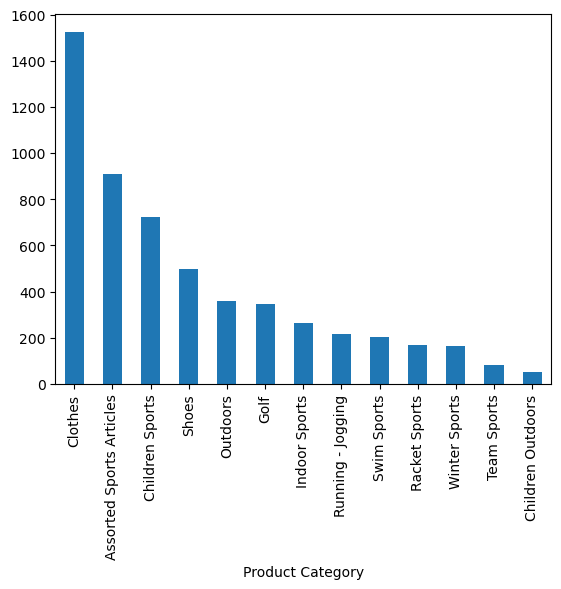

In [4]:
products = pd.read_csv('product-supplier.csv')
products['Product Category'].value_counts().plot(kind='bar')

In [5]:
df_merged = df.merge(products, on='Product ID', how='left')

In [6]:
df_merged.head()

Customer ID Customer Status Date Order was placed Delivery Date   Order ID  \
0          579          Silver             01-Jan-17     07-Jan-17  123002578   
1         7574          SILVER             01-Jan-17     05-Jan-17  123004074   
2        28861            Gold             01-Jan-17     04-Jan-17  123000871   
3        43796            Gold             01-Jan-17     06-Jan-17  123002851   
4        54673            Gold             01-Jan-17     04-Jan-17  123003607   

     Product ID  Quantity Ordered  Total Retail Price for This Order  \
0  220101400106                 2                               92.6   
1  210201000009                 1                               21.7   
2  230100500068                 1                                1.7   
3  220100100633                 1                               47.9   
4  220200200043                 1                               36.9   

   Cost Price Per Unit     Product Line Product Category  \
0                20.70  Clothes & Shoes          Clothes   
1                 9.95         Children  Children Sports   
2                 0.80         Outdoors         Outdoors   
3                24.05  Clothes & Shoes          Clothes   
4                18.30  Clothes & Shoes            Shoes   

           Product Group                       Product Name Supplier Country  \
0        Tracker Clothes     Casual V-Neck Men's Sweatshirt               US   
1  Tracker Kid's Clothes                     Children's Tee               US   
2           Outdoor Gear                  Plate Picnic Deep               GB   
3       Eclipse Clothing              Woman's Woven Pants L               US   
4                  Shoes  Soft Gel Court Men's Indoor Shoes               US   

        Supplier Name  Supplier ID  
0         3Top Sports         2963  
1         3Top Sports         2963  
2    Prime Sports Ltd          316  
3         Eclipse Inc         1303  
4  Pro Sportswear Inc         1747

### Nettoyage des données

In [8]:
df.shape

(185013, 9)

In [9]:
print(df.isnull().sum())

Customer ID                          0
Customer Status                      0
Date Order was placed                0
Delivery Date                        0
Order ID                             0
Product ID                           0
Quantity Ordered                     0
Total Retail Price for This Order    0
Cost Price Per Unit                  0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.7+ MB


In [11]:
df_merged['Date Order was placed'] = pd.to_datetime(
    df['Date Order was placed'],
    format='%d-%b-%y',       
    errors='coerce'           
)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.7+ MB


In [13]:
df.head()

Customer ID Customer Status Date Order was placed Delivery Date   Order ID  \
0          579          Silver             01-Jan-17     07-Jan-17  123002578   
1         7574          SILVER             01-Jan-17     05-Jan-17  123004074   
2        28861            Gold             01-Jan-17     04-Jan-17  123000871   
3        43796            Gold             01-Jan-17     06-Jan-17  123002851   
4        54673            Gold             01-Jan-17     04-Jan-17  123003607   

     Product ID  Quantity Ordered  Total Retail Price for This Order  \
0  220101400106                 2                               92.6   
1  210201000009                 1                               21.7   
2  230100500068                 1                                1.7   
3  220100100633                 1                               47.9   
4  220200200043                 1                               36.9   

   Cost Price Per Unit  
0                20.70  
1                 9.95  
2                 0.80  
3                24.05  
4                18.30

In [14]:
df[df['Date Order was placed'].isna()].shape[0]

0

In [20]:
df.duplicated().sum()

0

In [26]:
df[df['Quantity Ordered'] < 0].shape[0]

0

### Analyse exploratoire

**Analyse Temporelle**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        185013 non-null  int64  
 1   Customer Status                    185013 non-null  object 
 2   Date Order was placed              185013 non-null  object 
 3   Delivery Date                      185013 non-null  object 
 4   Order ID                           185013 non-null  int64  
 5   Product ID                         185013 non-null  int64  
 6   Quantity Ordered                   185013 non-null  int64  
 7   Total Retail Price for This Order  185013 non-null  float64
 8   Cost Price Per Unit                185013 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.7+ MB


In [35]:
df["Date Order was placed"]=pd.to_datetime(df["Date Order was placed"],errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_21076\1885400831.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date Order was placed"]=pd.to_datetime(df["Date Order was placed"],errors='coerce')


C:\Users\HP\AppData\Local\Temp\ipykernel_21076\4059692406.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum()


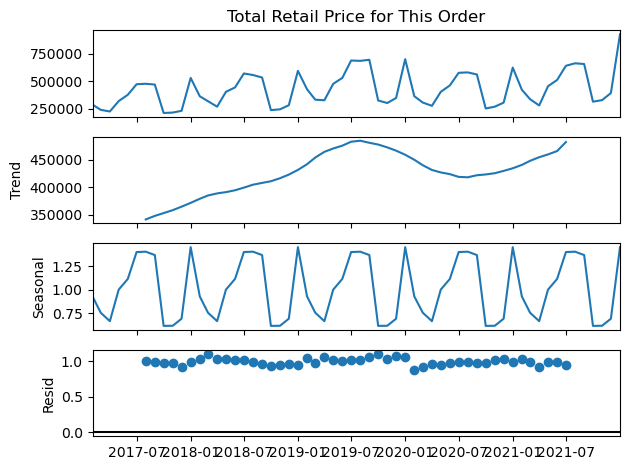

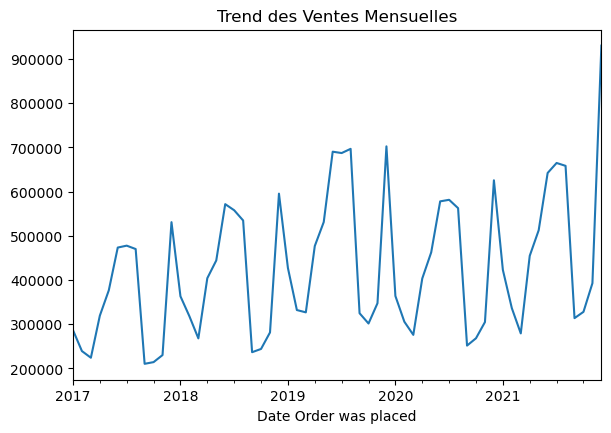

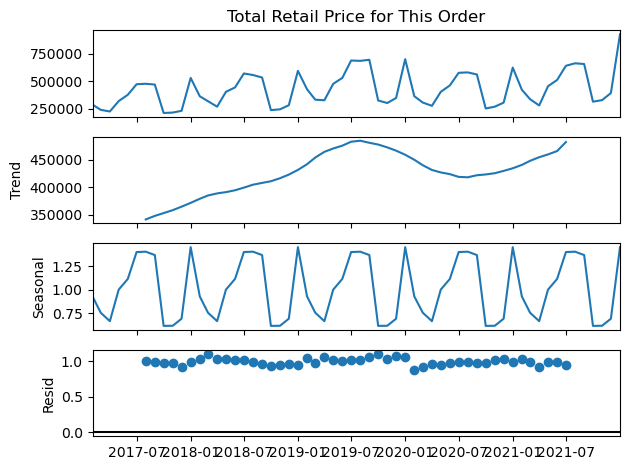

In [37]:
# Agrégation par période
daily_sales = df.groupby('Date Order was placed')['Total Retail Price for This Order'].sum()
monthly_sales = daily_sales.resample('M').sum()

# Visualisations
plt.figure(figsize=(15, 10))

# Trend des ventes
plt.subplot(2, 2, 1)
monthly_sales.plot(title='Trend des Ventes Mensuelles')

# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, model='multiplicative', period=12)
decomposition.plot()

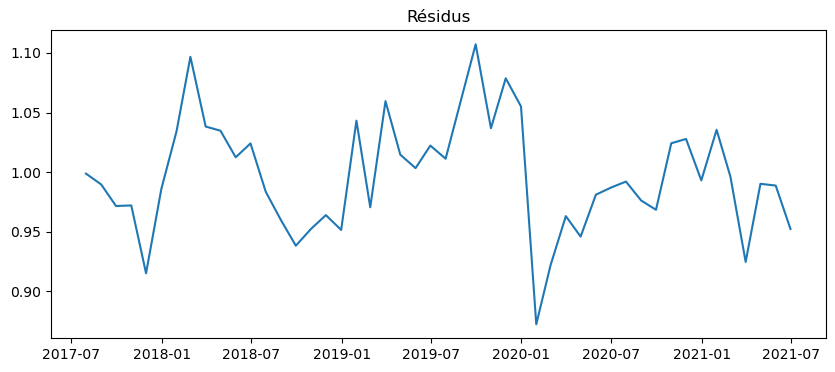

In [38]:
plt.figure(figsize=(10,4))
plt.plot(abs(decomposition.resid))
plt.title("Résidus")
plt.show()

In [39]:
print("Mean:", decomposition.resid.mean())
print("Std:", decomposition.resid.std())

Mean: 0.996418622221392
Std: 0.047594012944647594


La saisonnalité augmente quand la tendance augmente. Pour cette raison on a opté de choisir le model multiplicatif

##### **Interprétation** :

La moyenne ≈ 1 → normal dans un modèle multiplicatif (résidu = ratio)

Très faible standard deviation (≈ 0.05)

- les résidus sont très proches de 1.

- faible erreur, très bonne stabilité.

➝ modèle très cohérent.

In [45]:
df['Customer Status'] = df['Customer Status'].replace("GOLD", "Gold")
df['Customer Status'] = df['Customer Status'].replace("PLATINUM", "Platinum")
df['Customer Status'] = df['Customer Status'].replace("SILVER", "Silver")

In [47]:
df['Customer Status'].value_counts()

Customer Status
Silver      92541
Gold        88278
Platinum     4194
Name: count, dtype: int64

<Axes: title={'center': 'Quantité Totale Commandée par Statut de Client'}, xlabel='Customer Status'>

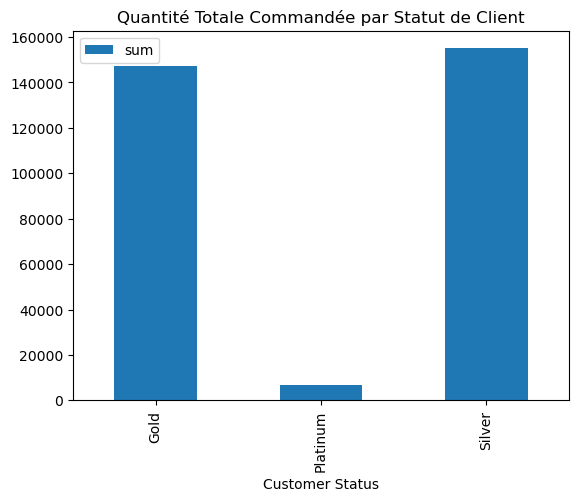

In [49]:
# Comportement des clients par statut
customer_analysis = df.groupby('Customer Status').agg({
    'Total Retail Price for This Order': ['sum', 'mean', 'count'],
    'Quantity Ordered': 'sum'
})

# Customer Lifetime Value
clv = df.groupby('Customer ID').agg({
    'Total Retail Price for This Order': 'sum',
    'Order ID': 'count'
}).rename(columns={'Total Retail Price for This Order': 'Total_Revenue', 'Order ID': 'Purchase_Count'})

#Visualisation 
customer_analysis['Quantity Ordered'].plot(kind='bar', title='Quantité Totale Commandée par Statut de Client')

<Axes: title={'center': 'Revenu Total par Statut de Client'}, xlabel='Customer Status'>

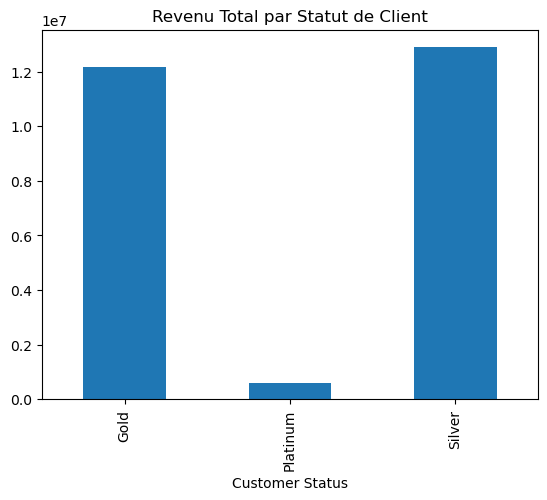

In [50]:
customer_analysis['Total Retail Price for This Order']['sum'].plot(kind='bar', title='Revenu Total par Statut de Client')

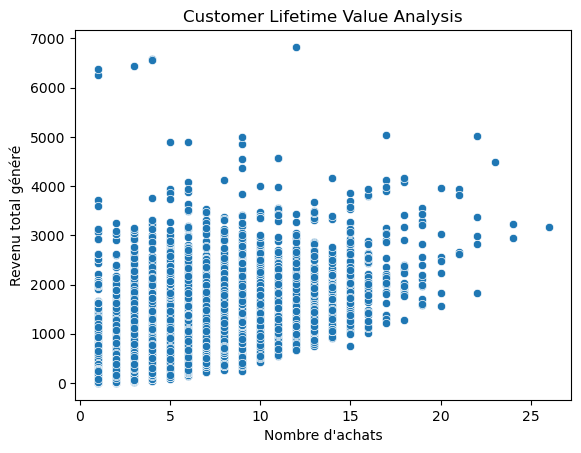

In [51]:
sns.scatterplot(data=clv, x='Purchase_Count', y='Total_Revenue')
plt.title('Customer Lifetime Value Analysis')
plt.xlabel('Nombre d\'achats')
plt.ylabel('Revenu total généré')
plt.show()

#### Analyse des Produits

In [56]:
df_merged.head()

Customer ID Customer Status Date Order was placed Delivery Date   Order ID  \
0          579          Silver            2017-01-01     07-Jan-17  123002578   
1         7574          SILVER            2017-01-01     05-Jan-17  123004074   
2        28861            Gold            2017-01-01     04-Jan-17  123000871   
3        43796            Gold            2017-01-01     06-Jan-17  123002851   
4        54673            Gold            2017-01-01     04-Jan-17  123003607   

     Product ID  Quantity Ordered  Total Retail Price for This Order  \
0  220101400106                 2                               92.6   
1  210201000009                 1                               21.7   
2  230100500068                 1                                1.7   
3  220100100633                 1                               47.9   
4  220200200043                 1                               36.9   

   Cost Price Per Unit     Product Line Product Category  \
0                20.70  Clothes & Shoes          Clothes   
1                 9.95         Children  Children Sports   
2                 0.80         Outdoors         Outdoors   
3                24.05  Clothes & Shoes          Clothes   
4                18.30  Clothes & Shoes            Shoes   

           Product Group                       Product Name Supplier Country  \
0        Tracker Clothes     Casual V-Neck Men's Sweatshirt               US   
1  Tracker Kid's Clothes                     Children's Tee               US   
2           Outdoor Gear                  Plate Picnic Deep               GB   
3       Eclipse Clothing              Woman's Woven Pants L               US   
4                  Shoes  Soft Gel Court Men's Indoor Shoes               US   

        Supplier Name  Supplier ID  
0         3Top Sports         2963  
1         3Top Sports         2963  
2    Prime Sports Ltd          316  
3         Eclipse Inc         1303  
4  Pro Sportswear Inc         1747

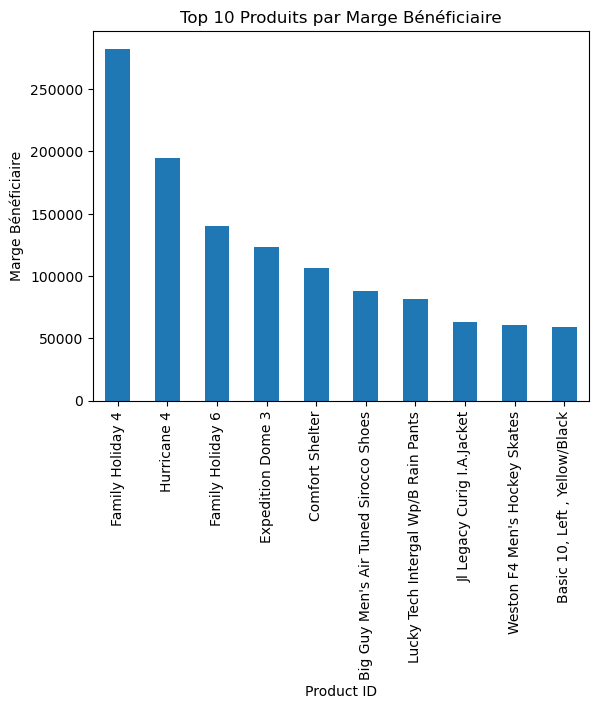

In [57]:
# Produits les plus rentables
product_performance = df_merged.groupby('Product Name').agg({
    'Quantity Ordered': 'sum',
    'Total Retail Price for This Order': 'sum',
    'Cost Price Per Unit': 'mean'
})

# Marge par produit
product_performance['Profit_Margin'] = (
    product_performance['Total Retail Price for This Order'] - 
    (product_performance['Quantity Ordered'] * product_performance['Cost Price Per Unit'])
)

#Visualisation
top_products = product_performance.sort_values(by='Profit_Margin', ascending=False).head(10)
top_products['Profit_Margin'].plot(kind='bar', title='Top 10 Produits par Marge Bénéficiaire')
plt.xlabel('Product ID')
plt.ylabel('Marge Bénéficiaire')
plt.show()

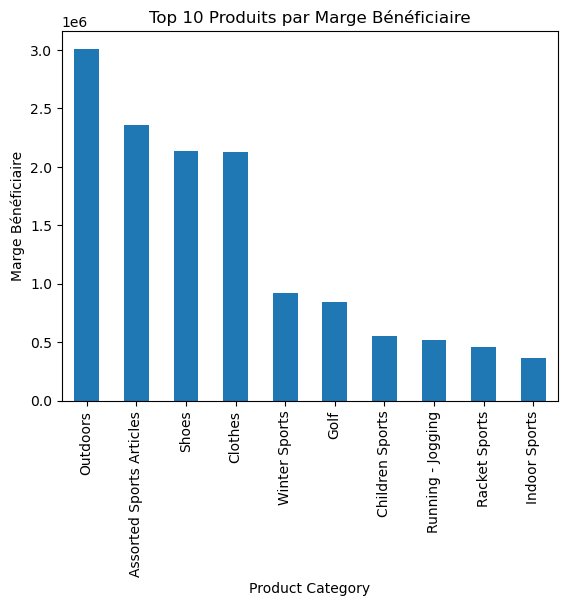

In [58]:
# Produits les plus rentables par categorie
product_performance_par_categorie = df_merged.groupby('Product Category').agg({
    'Quantity Ordered': 'sum',
    'Total Retail Price for This Order': 'sum',
    'Cost Price Per Unit': 'mean'
})

# Marge par produit
product_performance_par_categorie['Profit_Margin'] = (
    product_performance_par_categorie['Total Retail Price for This Order'] - 
    (product_performance_par_categorie['Quantity Ordered'] * product_performance_par_categorie['Cost Price Per Unit'])
)

#Visualisation
top_products = product_performance_par_categorie.sort_values(by='Profit_Margin', ascending=False).head(10)
top_products['Profit_Margin'].plot(kind='bar', title='Top 10 Produits par Marge Bénéficiaire')
plt.xlabel('Product Category')
plt.ylabel('Marge Bénéficiaire')
plt.show()

###  Feature engineering pour Time Series

**Création de features temporelles**

In [64]:
# Features de date
df_merged['year'] = df_merged['Date Order was placed'].dt.year
df_merged['month'] = df_merged['Date Order was placed'].dt.month
df_merged['quarter'] = df_merged['Date Order was placed'].dt.quarter
df_merged['day_of_week'] = df_merged['Date Order was placed'].dt.dayofweek
df_merged['is_weekend'] = df_merged['day_of_week'].isin([5, 6]).astype(int)

In [65]:
df_merged.head()

Customer ID Customer Status Date Order was placed Delivery Date   Order ID  \
0          579          Silver            2017-01-01     07-Jan-17  123002578   
1         7574          SILVER            2017-01-01     05-Jan-17  123004074   
2        28861            Gold            2017-01-01     04-Jan-17  123000871   
3        43796            Gold            2017-01-01     06-Jan-17  123002851   
4        54673            Gold            2017-01-01     04-Jan-17  123003607   

     Product ID  Quantity Ordered  Total Retail Price for This Order  \
0  220101400106                 2                               92.6   
1  210201000009                 1                               21.7   
2  230100500068                 1                                1.7   
3  220100100633                 1                               47.9   
4  220200200043                 1                               36.9   

   Cost Price Per Unit     Product Line  ...          Product Group  \
0                20.70  Clothes & Shoes  ...        Tracker Clothes   
1                 9.95         Children  ...  Tracker Kid's Clothes   
2                 0.80         Outdoors  ...           Outdoor Gear   
3                24.05  Clothes & Shoes  ...       Eclipse Clothing   
4                18.30  Clothes & Shoes  ...                  Shoes   

                        Product Name Supplier Country       Supplier Name  \
0     Casual V-Neck Men's Sweatshirt               US         3Top Sports   
1                     Children's Tee               US         3Top Sports   
2                  Plate Picnic Deep               GB    Prime Sports Ltd   
3              Woman's Woven Pants L               US         Eclipse Inc   
4  Soft Gel Court Men's Indoor Shoes               US  Pro Sportswear Inc   

  Supplier ID  year  month  quarter  day_of_week  is_weekend  
0        2963  2017      1        1            6           1  
1        2963  2017      1        1            6           1  
2         316  2017      1        1            6           1  
3        1303  2017      1        1            6           1  
4        1747  2017      1        1            6           1  

[5 rows x 21 columns]

In [68]:
# Lag features
def create_time_features(series, lags=[1, 7, 30, 90]):
    for lag in lags:
        series[f'lag_{lag}'] = series.shift(lag)
    return series

# Rolling statistics
df_merged['rolling_mean_7'] = df_merged['Total Retail Price for This Order'].rolling(window=7).mean()
df_merged['rolling_std_7'] = df_merged['Total Retail Price for This Order'].rolling(window=7).std()

In [70]:
df_merged

Customer ID Customer Status Date Order was placed Delivery Date  \
0               579          Silver            2017-01-01     07-Jan-17   
1              7574          SILVER            2017-01-01     05-Jan-17   
2             28861            Gold            2017-01-01     04-Jan-17   
3             43796            Gold            2017-01-01     06-Jan-17   
4             54673            Gold            2017-01-01     04-Jan-17   
...             ...             ...                   ...           ...   
185008        92467          SILVER            2021-12-31     31-Dec-21   
185009        92866          Silver            2021-12-31     31-Dec-21   
185010        92894          Silver            2021-12-31     31-Dec-21   
185011        93239            Gold            2021-12-31     02-Jan-22   
185012        93317          Silver            2021-12-31     31-Dec-21   

         Order ID    Product ID  Quantity Ordered  \
0       123002578  220101400106                 2   
1       123004074  210201000009                 1   
2       123000871  230100500068                 1   
3       123002851  220100100633                 1   
4       123003607  220200200043                 1   
...           ...           ...               ...   
185008  124433239  240100200001                 4   
185009  124436561  230100500058                 1   
185010  124434316  220200100035                 5   
185011  124436170  220200200047                 2   
185012  124434324  220101400196                 4   

        Total Retail Price for This Order  Cost Price Per Unit  \
0                                    92.6                20.70   
1                                    21.7                 9.95   
2                                     1.7                 0.80   
3                                    47.9                24.05   
4                                    36.9                18.30   
...                                   ...                  ...   
185008                               64.0                 6.35   
185009                               16.7                 7.25   
185010                              313.0                31.40   
185011                              271.6                68.00   
185012                               95.6                10.95   

           Product Line  ... Supplier Country       Supplier Name Supplier ID  \
0       Clothes & Shoes  ...               US         3Top Sports        2963   
1              Children  ...               US         3Top Sports        2963   
2              Outdoors  ...               GB    Prime Sports Ltd         316   
3       Clothes & Shoes  ...               US         Eclipse Inc        1303   
4       Clothes & Shoes  ...               US  Pro Sportswear Inc        1747   
...                 ...  ...              ...                 ...         ...   
185008           Sports  ...               GB     Royal Darts Ltd        4514   
185009         Outdoors  ...               GB    Prime Sports Ltd         316   
185010  Clothes & Shoes  ...               US         Eclipse Inc        1303   
185011  Clothes & Shoes  ...               US  Pro Sportswear Inc        1747   
185012  Clothes & Shoes  ...               US         3Top Sports        2963   

        year month  quarter  day_of_week  is_weekend  rolling_mean_7  \
0       2017     1        1            6           1             NaN   
1       2017     1        1            6           1             NaN   
2       2017     1        1            6           1             NaN   
3       2017     1        1            6           1             NaN   
4       2017     1        1            6           1             NaN   
...      ...   ...      ...          ...         ...             ...   
185008  2021    12        4            4           0      110.491429   
185009  2021    12        4            4           0       85.248571   
185010  2021    12        4            4           0    

### Modélisation Time Series

**Préparation des Données pour Modélisation**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Séries temporelles pour modélisation
ts_data = df_merged.set_index('Date Order was placed')['Total Retail Price for This Order'].resample('D').sum()

ts_data.head()

Date Order was placed
2017-01-01      225.50
2017-01-02    10476.30
2017-01-03     8683.20
2017-01-04     3434.19
2017-01-05     9129.80
Freq: D, Name: Total Retail Price for This Order, dtype: float64

In [76]:
# Train-test split (80-20)
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

In [188]:
test['ds'].to_csv("test.csv", index=False)

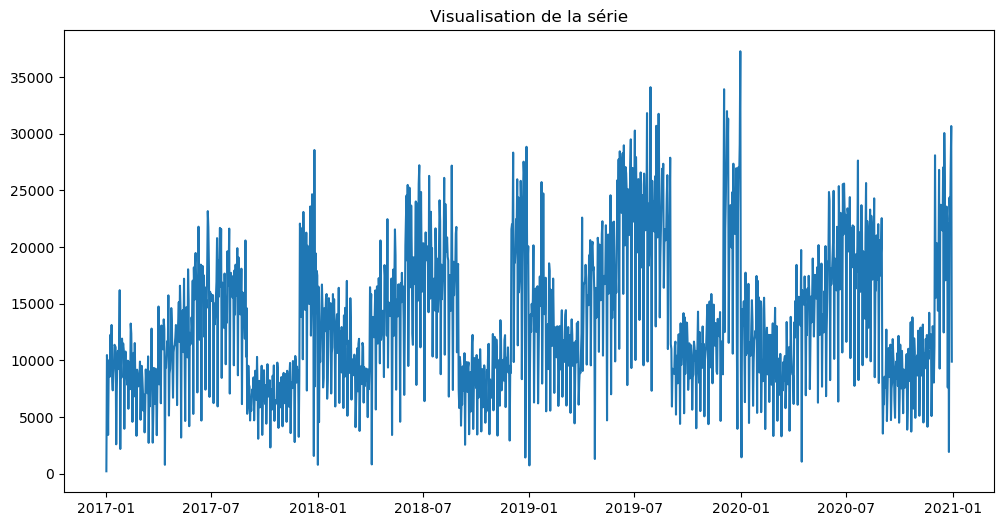

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(train)
plt.title('Visualisation de la série')
plt.show()

**Implémentation des Modèles**

In [81]:
train = df_merged[:df_merged.shape[0] - 90]

In [83]:
train.shape

(184923, 23)

In [85]:
daily_all = (
    df_merged.groupby('Date Order was placed')['Total Retail Price for This Order']
      .sum()
      .asfreq('D', fill_value=0)         # garantit 1 ligne par jour
      .reset_index()
      .rename(columns={'Date Order was placed': 'ds',
                       'Total Retail Price for This Order': 'y'})
      .sort_values('ds')
)

# 2) Split temporel : 90 DERNIERS JOURS CIVILS pour le test
test_horizon = 90
train = daily_all.iloc[:-test_horizon].copy()
test  = daily_all.iloc[-test_horizon:].copy()

In [90]:
from prophet import Prophet   # pip install prophet

# Modèle avec saisonnalités annuelle + hebdomadaire
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

m.fit(train)

# Horizon de prévision, ici 90 jours
#future = m.make_future_dataframe(periods=90, freq='D')
#forecast = m.predict(future)

# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


future = test[['ds']].copy()
forecast = m.predict(future)

# Fusion pour comparer y réel vs yhat
test_pred = test.merge(
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='left'
)

09:40:08 - cmdstanpy - INFO - Chain [1] start processing
09:40:09 - cmdstanpy - INFO - Chain [1] done processing


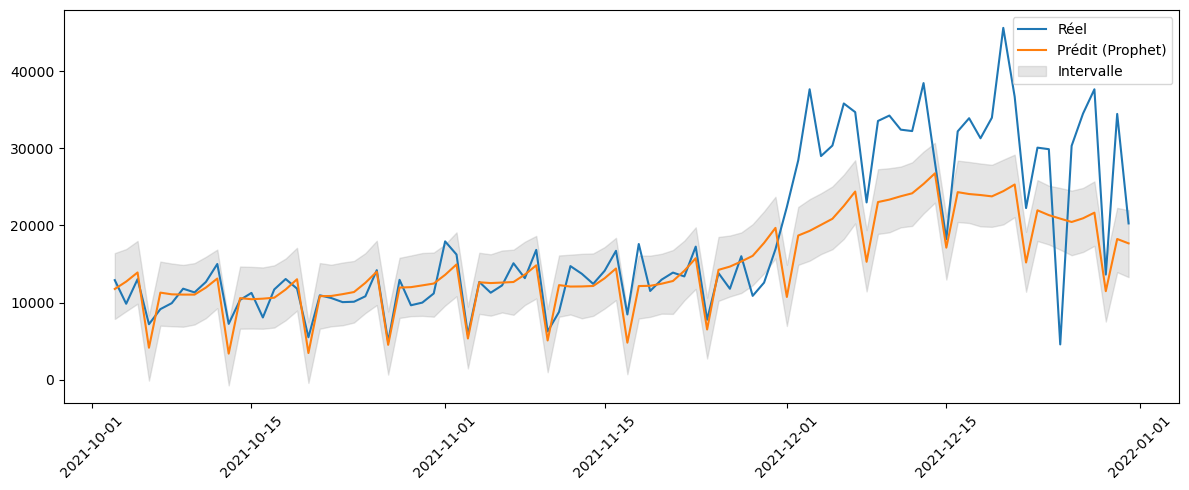

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_pred['ds'], test_pred['y'], label='Réel')
plt.plot(test_pred['ds'], test_pred['yhat'], label='Prédit (Prophet)')
plt.fill_between(test_pred['ds'],
                 test_pred['yhat_lower'],
                 test_pred['yhat_upper'],
                 color='gray', alpha=0.2, label='Intervalle')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Fusion réel / prédit sur les 90 jours (si ce n'est pas déjà fait)
test_pred = test.merge(
    forecast[['ds', 'yhat']],
    on='ds',
    how='left'
)

y_true = test_pred['y'].values
y_pred = test_pred['yhat'].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # en %

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"MAPE : {mape:.2f}%")


MAE  : 4,538.87
RMSE : 6,706.68
MAPE : 24.00%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
import pandas as pd
from prophet import Prophet

# 1) DataFrame des vacances / événements
holidays = pd.DataFrame({
    'holiday': ['noel', 'nouvel_an', 'soldes_hiver', 'black_friday'],
    'ds': pd.to_datetime([
        '2021-12-25', '2022-01-01', '2021-01-06', '2021-11-26'
    ]),
    'lower_window': [0, 0, -3, -1],   # effet commence avant
    'upper_window': [1, 1, 3, 2]      # et finit après
})

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    holidays_prior_scale=10
)

m.fit(train)              # train = tes données quotidiennes agrégées
future = test[['ds']].copy()
forecast = m.predict(future)


10:16:04 - cmdstanpy - INFO - Chain [1] start processing
10:16:04 - cmdstanpy - INFO - Chain [1] done processing


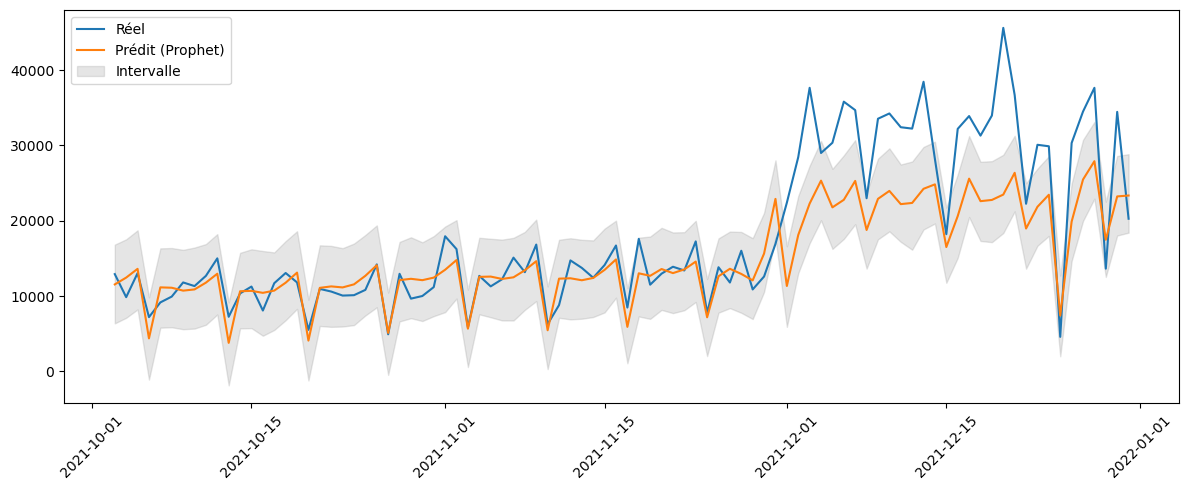

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_pred['ds'], test_pred['y'], label='Réel')
plt.plot(test_pred['ds'], test_pred['yhat'], label='Prédit (Prophet)')
plt.fill_between(test_pred['ds'],
                 test_pred['yhat_lower'],
                 test_pred['yhat_upper'],
                 color='gray', alpha=0.2, label='Intervalle')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [146]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Fusion réel / prédit sur les 90 jours (si ce n'est pas déjà fait)
test_pred = test.merge(
    forecast[['ds', 'yhat']],
    on='ds',
    how='left'
)

y_true = test_pred['y'].values
y_pred = test_pred['yhat'].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # en %

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"MAPE : {mape:.2f}%")
print(r2_score(y_true, y_pred))


MAE  : 4,537.51
RMSE : 6,704.94
MAPE : 23.98%
0.56138765433901


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [104]:
test_pred['abs_err']   = np.abs(test_pred['y'] - test_pred['yhat'])
test_pred['perc_err']  = 100 * test_pred['abs_err'] / test_pred['y'].replace(0, np.nan)


In [182]:
from tbats import TBATS   # pip install tbats
import numpy as np

# Série temporelle en index Date
ts = train.set_index('ds')['y']

# Optionnel : transformation log si toutes les valeurs sont > 0
y_series = np.log1p(ts)   # log(1 + y) pour éviter les zéros

# TBATS avec saisonnalités hebdo (7) et annuelle (365)
estimator = TBATS(
    seasonal_periods=[7, 365],
    use_arma_errors=True
)
tbats_model = estimator.fit(y_series)

# Prévision sur 90 jours
tbats_forecast = tbats_model.forecast(steps=90)

# Si tu as utilisé log1p, repasse dans l’échelle d’origine :
tbats_forecast_orig = np.expm1(tbats_forecast)

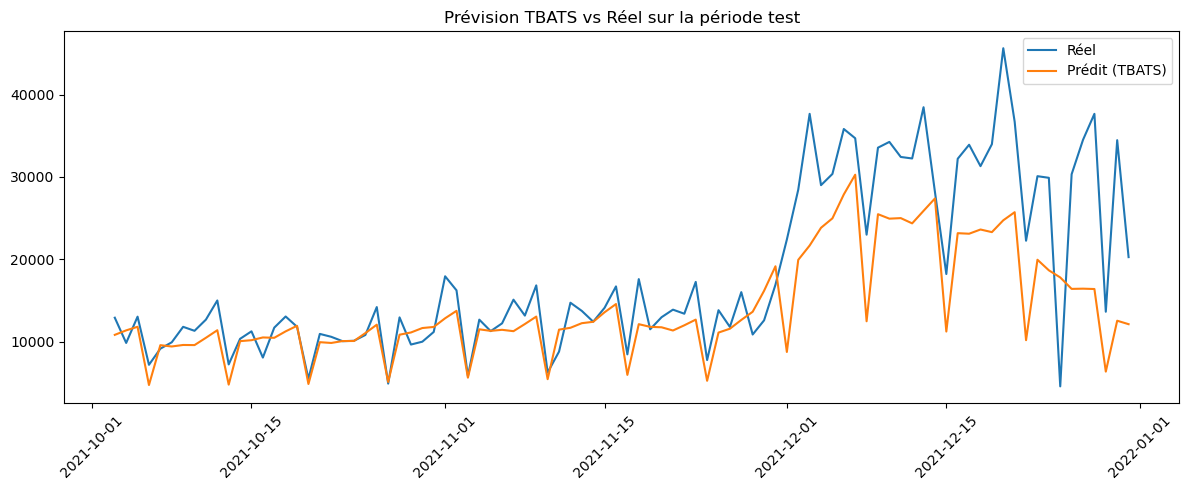

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# test = tes 90 derniers jours, colonne 'ds' avec les bonnes dates
# tbats_forecast_orig = tes prédictions TBATS remises à l'échelle d'origine
# On suppose que test['y'] contient le réel

# Vérifie que la taille de test et tbats_forecast_orig correspond
assert len(test) == len(tbats_forecast_orig)

# Création DataFrame pour la visualisation
tbats_df = test[['ds', 'y']].copy()
tbats_df['yhat_tbats'] = tbats_forecast_orig

plt.figure(figsize=(12,5))
plt.plot(tbats_df['ds'], tbats_df['y'], label='Réel')
plt.plot(tbats_df['ds'], tbats_df['yhat_tbats'], label='Prédit (TBATS)')
plt.legend()
plt.xticks(rotation=45)
plt.title("Prévision TBATS vs Réel sur la période test")
plt.tight_layout()
plt.show()


In [140]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# tbats_forecast_orig = tes 90 prédictions TBATS (échelle originale)
# test['y'] = les valeurs réelles pour les 90 derniers jours

y_true = test['y'].values
y_pred = tbats_forecast_orig

mae  = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # en %

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"MAPE : {mape:.2f}%")
print(r2_score(y_true, y_pred))


MAE  : 4,830.64
RMSE : 7,127.64
MAPE : 24.28%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



TypeError: 'r2' is an invalid keyword argument for print()

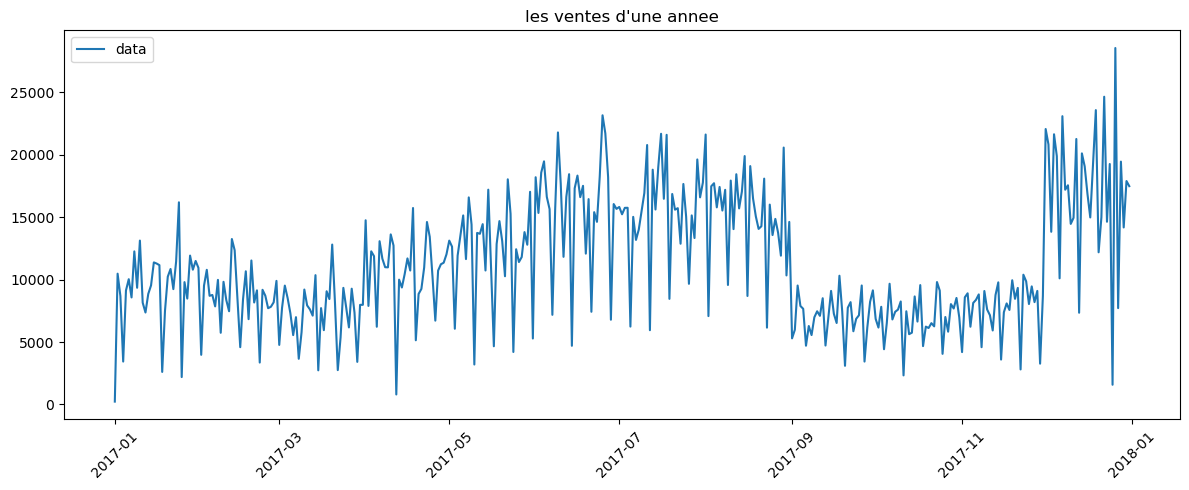

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12,5))
plt.plot(daily_all['ds'][:365], daily_all['y'][:365], label='data')
plt.legend()
plt.xticks(rotation=45)
plt.title("les ventes d'une annee")
plt.tight_layout()
plt.show()

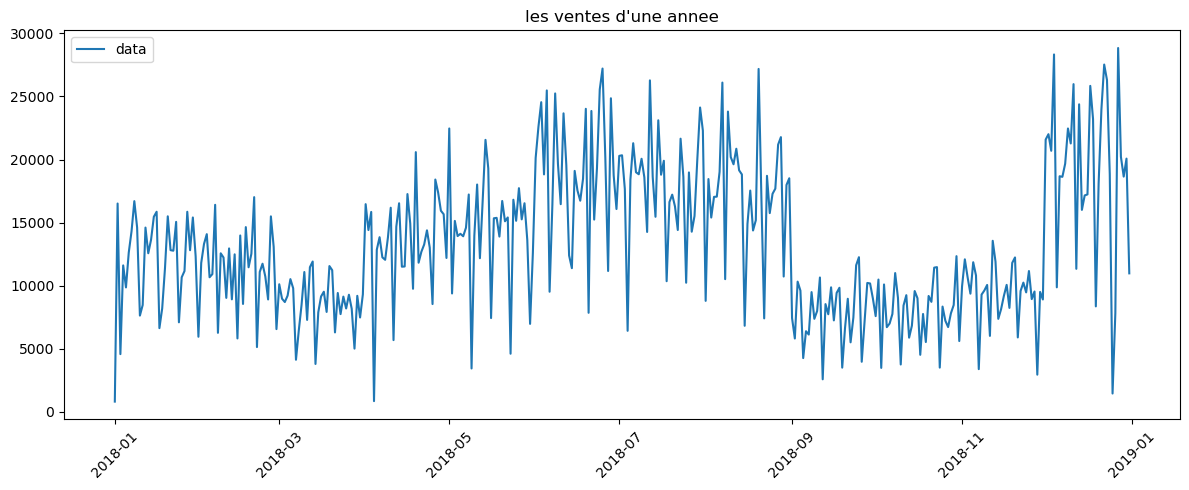

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12,5))
plt.plot(daily_all['ds'][365:730], daily_all['y'][365:730], label='data')
plt.legend()
plt.xticks(rotation=45)
plt.title("les ventes d'une annee")
plt.tight_layout()
plt.show()

10:10:45 - cmdstanpy - INFO - Chain [1] start processing
10:10:46 - cmdstanpy - INFO - Chain [1] done processing


✅ Prédiction terminée
          ds          yhat   yhat_lower    yhat_upper
0 2021-10-03  11539.651888  6360.396408  16828.116944
1 2021-10-04  12446.044722  7104.207483  17533.644164
2 2021-10-05  13608.206862  8216.272827  18728.545253
3 2021-10-06   4367.121882 -1112.240219   9823.104393
4 2021-10-07  11148.064852  5791.298196  16330.249856

📊 Aperçu des données fusionnées :
          ds          y          yhat   yhat_lower    yhat_upper
0 2021-10-03  12909.390  11539.651888  6360.396408  16828.116944
1 2021-10-04   9846.500  12446.044722  7104.207483  17533.644164
2 2021-10-05  13036.800  13608.206862  8216.272827  18728.545253
3 2021-10-06   7191.965   4367.121882 -1112.240219   9823.104393
4 2021-10-07   9148.190  11148.064852  5791.298196  16330.249856
5 2021-10-08   9923.380  11098.298993  5846.875642  16376.534176
6 2021-10-09  11802.555  10713.234862  5585.161431  16134.015055
7 2021-10-10  11319.430  10875.046914  5671.498241  16438.313778
8 2021-10-11  12677.465  11775.800

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



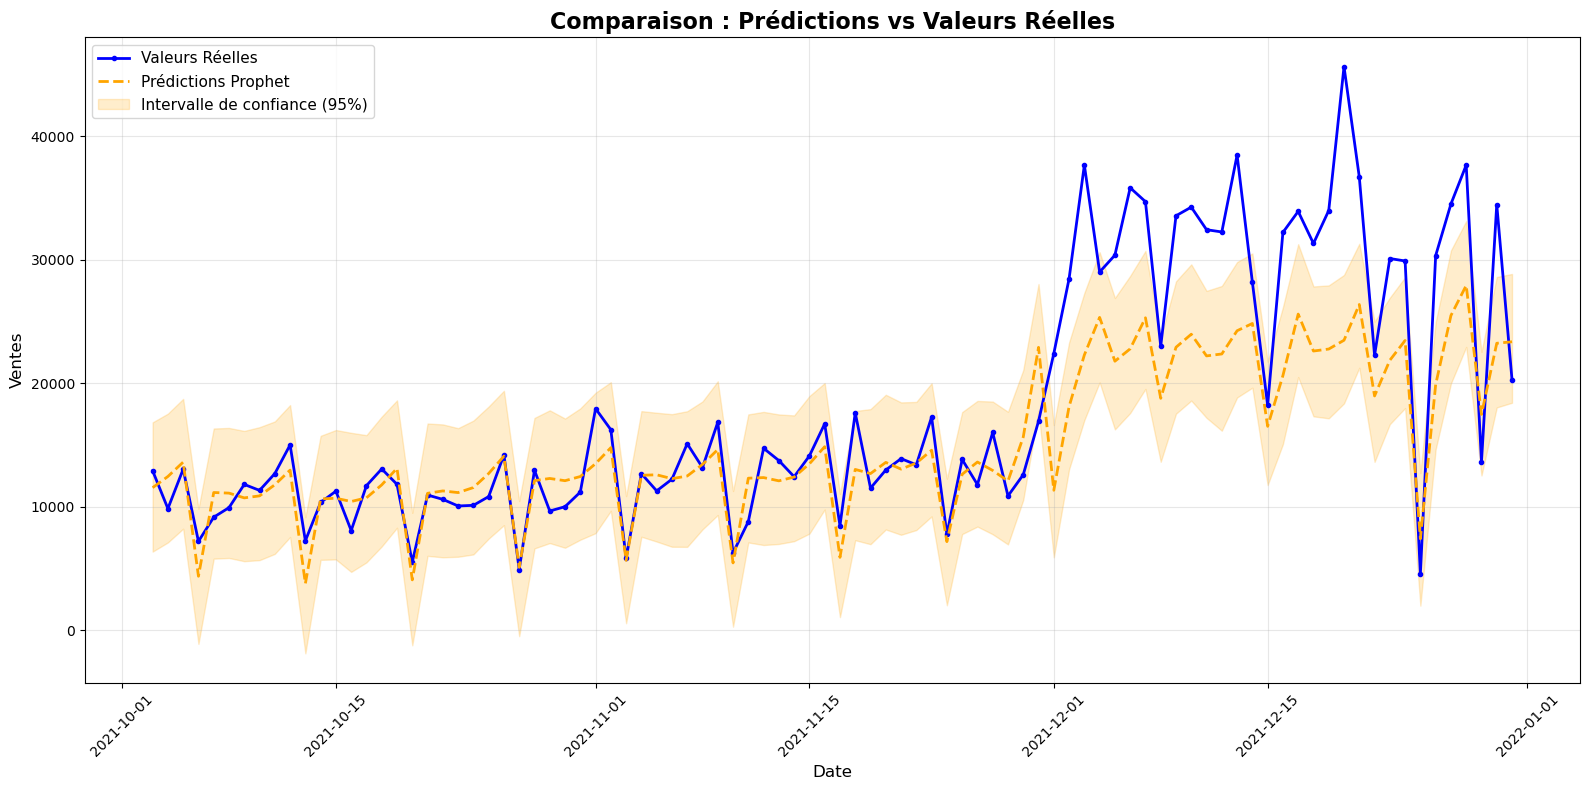

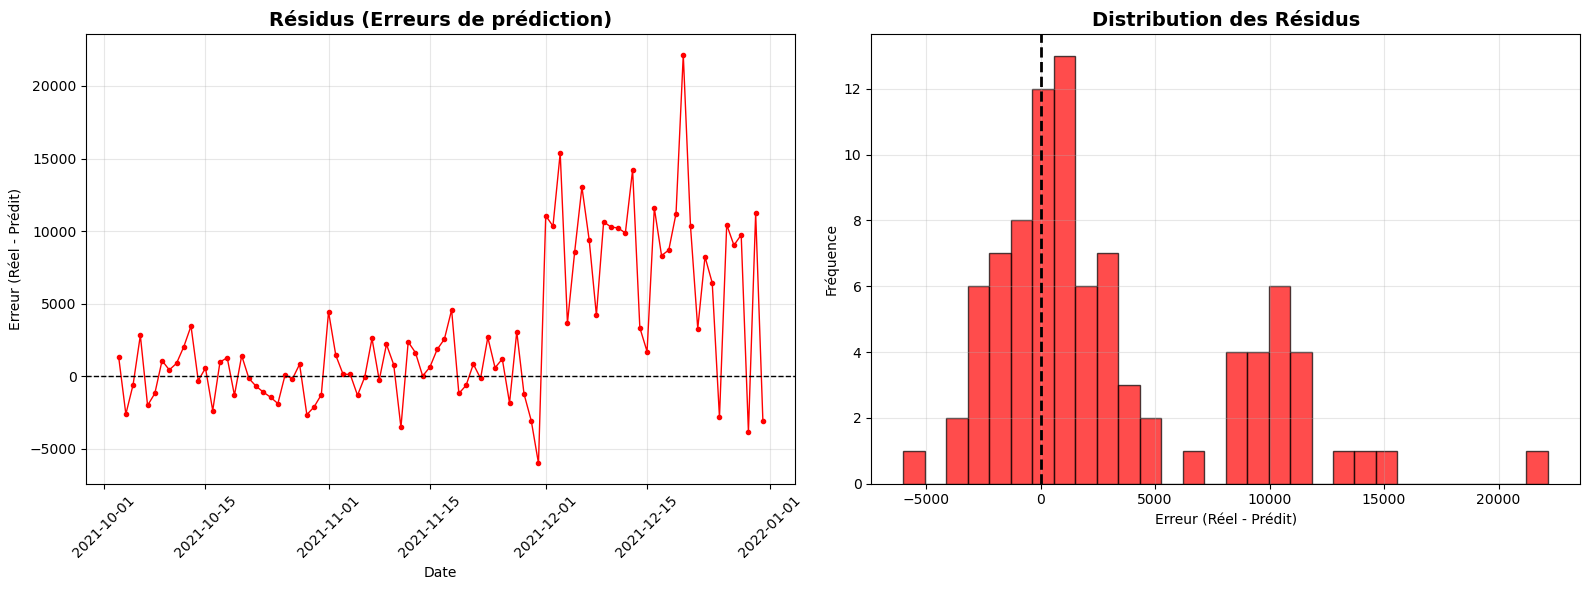


🔴 Top 10 des PIRES prédictions (erreur absolue) :
           ds          y          yhat    erreur_abs  erreur_pct
78 2021-12-20  45627.260  23476.910832  22150.349168   48.546306
61 2021-12-03  37663.170  22283.117539  15380.052461   40.835789
71 2021-12-13  38468.460  24244.905694  14223.554306   36.974587
64 2021-12-06  35821.940  22781.386646  13040.553354   36.403817
74 2021-12-16  32206.660  20614.400751  11592.259249   35.993361
88 2021-12-30  34466.430  23231.616771  11234.813229   32.596394
77 2021-12-19  33978.560  22764.532866  11214.027134   33.003244
59 2021-12-01  22398.520  11329.976756  11068.543244   49.416404
67 2021-12-09  33554.385  22908.234770  10646.150230   31.728045
84 2021-12-26  30328.510  19881.081109  10447.428891   34.447551

🟢 Top 10 des MEILLEURES prédictions (erreur absolue) :
           ds         y          yhat  erreur_abs  erreur_pct
42 2021-11-14  12426.84  12399.774375   27.065625    0.217800
34 2021-11-06  12225.88  12267.724820   41.844820    0

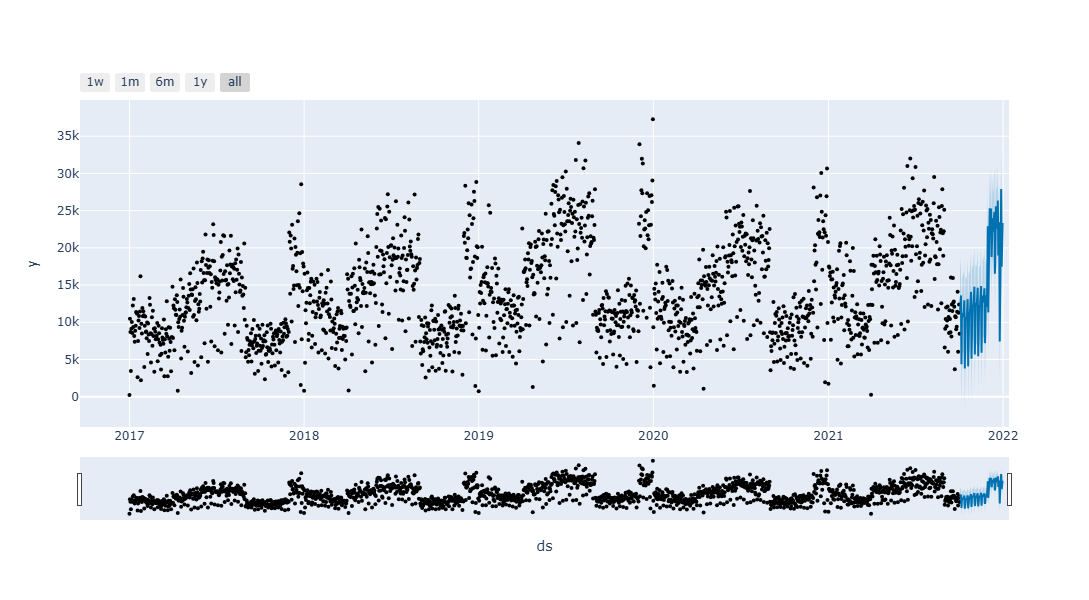

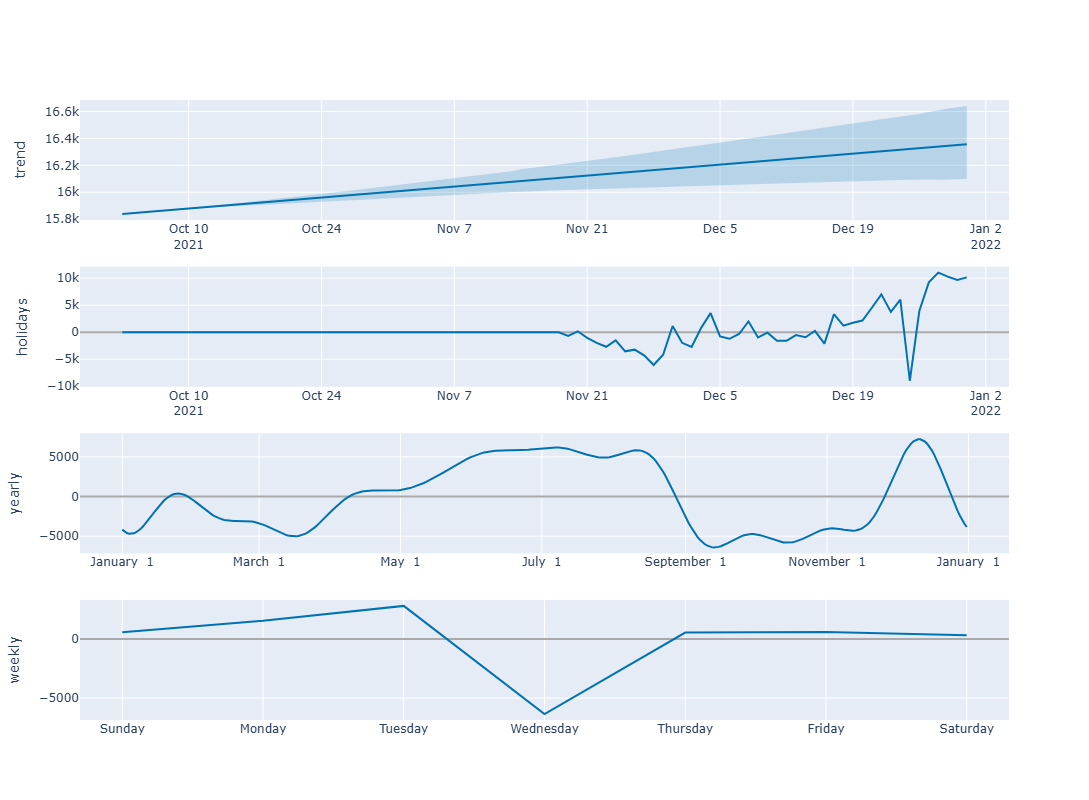

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# ========================================
# 1. DÉFINITION DES HOLIDAYS
# ========================================
holidays = pd.DataFrame({
    'holiday': [
        'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver',
        'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin',
        'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres',
        'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete',
        'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire',
        'black_friday', 'black_friday', 'black_friday', 'black_friday', 'black_friday', 'black_friday',
        'noel', 'noel', 'noel', 'noel', 'noel', 'noel'
    ],
    'ds': pd.to_datetime([
        '2017-01-04', '2018-01-10', '2019-01-09', '2020-01-08', '2021-01-06', '2022-01-12',
        '2017-02-14', '2018-02-14', '2019-02-14', '2020-02-14', '2021-02-14', '2022-02-14',
        '2017-05-28', '2018-05-27', '2019-05-26', '2020-05-24', '2021-05-30', '2022-05-29',
        '2017-06-28', '2018-06-27', '2019-06-26', '2020-07-15', '2021-06-23', '2022-06-22',
        '2017-09-04', '2018-09-03', '2019-09-02', '2020-09-01', '2021-09-02', '2022-09-01',
        '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25',
        '2017-12-15', '2018-12-15', '2019-12-15', '2020-12-15', '2021-12-15', '2022-12-15'
    ]),
    'lower_window': [
        -5, -5, -5, -5, -5, -5,
        -3, -3, -3, -3, -3, -3,
        -7, -7, -7, -7, -7, -7,
        -3, -3, -3, -3, -3, -3,
        -10, -10, -10, -10, -10, -10,
        -7, -7, -7, -7, -7, -7,
        -10, -10, -10, -10, -10, -10
    ],
    'upper_window': [
        42, 42, 42, 42, 42, 42,
        2, 2, 2, 2, 2, 2,
        5, 5, 5, 5, 5, 5,
        35, 35, 35, 35, 35, 35,
        25, 25, 25, 25, 25, 25,
        10, 10, 10, 10, 10, 10,
        16, 16, 16, 16, 16, 16
    ]
})

# ========================================
# 2. ENTRAÎNEMENT DU MODÈLE
# ========================================
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    holidays_prior_scale=10,
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05,
    interval_width=0.95
)

m.fit(train)

# ========================================
# 3. PRÉDICTION SUR LA PÉRIODE DE TEST
# ========================================
# Option 1 : Si tu veux prédire sur la période future
# future = m.make_future_dataframe(periods=len(test), freq='D')

# Option 2 : Si tu veux prédire UNIQUEMENT sur les dates de test
future = test[['ds']].copy()

forecast = m.predict(future)

print("✅ Prédiction terminée")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# ========================================
# 4. FUSION DES PRÉDICTIONS AVEC LES VALEURS RÉELLES
# ========================================
test_pred = test.merge(
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='left'
)

# Vérification
print("\n📊 Aperçu des données fusionnées :")
print(test_pred[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

# ========================================
# 5. CALCUL DES MÉTRIQUES DE PERFORMANCE
# ========================================
y_true = test_pred['y'].values
y_pred = test_pred['yhat'].values

# Métriques
mae  = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
r2   = r2_score(y_true, y_pred)

# Erreurs en pourcentage
mean_error_pct = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\n" + "="*50)
print("📈 MÉTRIQUES DE PERFORMANCE")
print("="*50)
print(f"MAE  (Mean Absolute Error)       : {mae:,.2f}")
print(f"RMSE (Root Mean Squared Error)   : {rmse:,.2f}")
print(f"MAPE (Mean Absolute % Error)     : {mape:.2f}%")
print(f"R²   (Coefficient de détermination) : {r2:.4f}")
print(f"Erreur moyenne en %              : {mean_error_pct:.2f}%")
print("="*50)

# ========================================
# 6. VISUALISATION : PRÉDICTIONS VS RÉEL
# ========================================
plt.figure(figsize=(16, 8))

# Plot des valeurs réelles
plt.plot(test_pred['ds'], test_pred['y'], 
         label='Valeurs Réelles', color='blue', linewidth=2, marker='o', markersize=3)

# Plot des prédictions
plt.plot(test_pred['ds'], test_pred['yhat'], 
         label='Prédictions Prophet', color='orange', linewidth=2, linestyle='--')

# Intervalle de confiance
plt.fill_between(test_pred['ds'], 
                 test_pred['yhat_lower'], 
                 test_pred['yhat_upper'], 
                 alpha=0.2, color='orange', label='Intervalle de confiance (95%)')

plt.title('Comparaison : Prédictions vs Valeurs Réelles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========================================
# 7. GRAPHIQUE DES ERREURS (RÉSIDUS)
# ========================================
residus = y_true - y_pred

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(test_pred['ds'], residus, color='red', linewidth=1, marker='o', markersize=3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Résidus (Erreurs de prédiction)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Erreur (Réel - Prédit)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(residus, bins=30, color='red', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.title('Distribution des Résidus', fontsize=14, fontweight='bold')
plt.xlabel('Erreur (Réel - Prédit)')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# 8. TABLEAU RÉCAPITULATIF DES PIRES/MEILLEURES PRÉDICTIONS
# ========================================
test_pred['erreur_abs'] = np.abs(test_pred['y'] - test_pred['yhat'])
test_pred['erreur_pct'] = (np.abs(test_pred['y'] - test_pred['yhat']) / test_pred['y']) * 100

print("\n🔴 Top 10 des PIRES prédictions (erreur absolue) :")
print(test_pred.nlargest(10, 'erreur_abs')[['ds', 'y', 'yhat', 'erreur_abs', 'erreur_pct']])

print("\n🟢 Top 10 des MEILLEURES prédictions (erreur absolue) :")
print(test_pred.nsmallest(10, 'erreur_abs')[['ds', 'y', 'yhat', 'erreur_abs', 'erreur_pct']])

# ========================================
# 9. GRAPHIQUES PROPHET (optionnel)
# ========================================
# Plot interactif complet
fig1 = plot_plotly(m, forecast)
fig1.show()

# Composants de la prédiction (tendance, saisonnalité, holidays)
fig2 = plot_components_plotly(m, forecast)
fig2.show()

🔍 DÉBUT DU GRID SEARCH...
📊 Nombre total de combinaisons à tester : 200


10:18:14 - cmdstanpy - INFO - Chain [1] start processing
10:18:14 - cmdstanpy - INFO - Chain [1] done processing
10:18:15 - cmdstanpy - INFO - Chain [1] start processing
10:18:15 - cmdstanpy - INFO - Chain [1] done processing
10:18:16 - cmdstanpy - INFO - Chain [1] start processing
10:18:16 - cmdstanpy - INFO - Chain [1] done processing
10:18:17 - cmdstanpy - INFO - Chain [1] start processing
10:18:17 - cmdstanpy - INFO - Chain [1] done processing
10:18:17 - cmdstanpy - INFO - Chain [1] start processing
10:18:18 - cmdstanpy - INFO - Chain [1] done processing
10:18:18 - cmdstanpy - INFO - Chain [1] start processing
10:18:18 - cmdstanpy - INFO - Chain [1] done processing
10:18:19 - cmdstanpy - INFO - Chain [1] start processing
10:18:19 - cmdstanpy - INFO - Chain [1] done processing
10:18:20 - cmdstanpy - INFO - Chain [1] start processing
10:18:20 - cmdstanpy - INFO - Chain [1] done processing
10:18:21 - cmdstanpy - INFO - Chain [1] start processing
10:18:21 - cmdstanpy - INFO - Chain [1]

✅ 20/200 combinaisons testées...


10:18:31 - cmdstanpy - INFO - Chain [1] start processing
10:18:32 - cmdstanpy - INFO - Chain [1] done processing
10:18:32 - cmdstanpy - INFO - Chain [1] start processing
10:18:32 - cmdstanpy - INFO - Chain [1] done processing
10:18:33 - cmdstanpy - INFO - Chain [1] start processing
10:18:33 - cmdstanpy - INFO - Chain [1] done processing
10:18:34 - cmdstanpy - INFO - Chain [1] start processing
10:18:34 - cmdstanpy - INFO - Chain [1] done processing
10:18:35 - cmdstanpy - INFO - Chain [1] start processing
10:18:35 - cmdstanpy - INFO - Chain [1] done processing
10:18:35 - cmdstanpy - INFO - Chain [1] start processing
10:18:36 - cmdstanpy - INFO - Chain [1] done processing
10:18:36 - cmdstanpy - INFO - Chain [1] start processing
10:18:36 - cmdstanpy - INFO - Chain [1] done processing
10:18:37 - cmdstanpy - INFO - Chain [1] start processing
10:18:37 - cmdstanpy - INFO - Chain [1] done processing
10:18:38 - cmdstanpy - INFO - Chain [1] start processing
10:18:38 - cmdstanpy - INFO - Chain [1]

✅ 40/200 combinaisons testées...


10:18:48 - cmdstanpy - INFO - Chain [1] start processing
10:18:49 - cmdstanpy - INFO - Chain [1] done processing
10:18:49 - cmdstanpy - INFO - Chain [1] start processing
10:18:49 - cmdstanpy - INFO - Chain [1] done processing
10:18:50 - cmdstanpy - INFO - Chain [1] start processing
10:18:50 - cmdstanpy - INFO - Chain [1] done processing
10:18:51 - cmdstanpy - INFO - Chain [1] start processing
10:18:51 - cmdstanpy - INFO - Chain [1] done processing
10:18:52 - cmdstanpy - INFO - Chain [1] start processing
10:18:52 - cmdstanpy - INFO - Chain [1] done processing
10:18:53 - cmdstanpy - INFO - Chain [1] start processing
10:18:53 - cmdstanpy - INFO - Chain [1] done processing
10:18:54 - cmdstanpy - INFO - Chain [1] start processing
10:18:54 - cmdstanpy - INFO - Chain [1] done processing
10:18:55 - cmdstanpy - INFO - Chain [1] start processing
10:18:55 - cmdstanpy - INFO - Chain [1] done processing
10:18:56 - cmdstanpy - INFO - Chain [1] start processing
10:18:56 - cmdstanpy - INFO - Chain [1]

✅ 60/200 combinaisons testées...


10:19:08 - cmdstanpy - INFO - Chain [1] start processing
10:19:08 - cmdstanpy - INFO - Chain [1] done processing
10:19:09 - cmdstanpy - INFO - Chain [1] start processing
10:19:09 - cmdstanpy - INFO - Chain [1] done processing
10:19:10 - cmdstanpy - INFO - Chain [1] start processing
10:19:10 - cmdstanpy - INFO - Chain [1] done processing
10:19:11 - cmdstanpy - INFO - Chain [1] start processing
10:19:11 - cmdstanpy - INFO - Chain [1] done processing
10:19:11 - cmdstanpy - INFO - Chain [1] start processing
10:19:12 - cmdstanpy - INFO - Chain [1] done processing
10:19:12 - cmdstanpy - INFO - Chain [1] start processing
10:19:13 - cmdstanpy - INFO - Chain [1] done processing
10:19:13 - cmdstanpy - INFO - Chain [1] start processing
10:19:14 - cmdstanpy - INFO - Chain [1] done processing
10:19:14 - cmdstanpy - INFO - Chain [1] start processing
10:19:15 - cmdstanpy - INFO - Chain [1] done processing
10:19:15 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1]

✅ 80/200 combinaisons testées...


10:19:26 - cmdstanpy - INFO - Chain [1] start processing
10:19:27 - cmdstanpy - INFO - Chain [1] done processing
10:19:27 - cmdstanpy - INFO - Chain [1] start processing
10:19:28 - cmdstanpy - INFO - Chain [1] done processing
10:19:28 - cmdstanpy - INFO - Chain [1] start processing
10:19:29 - cmdstanpy - INFO - Chain [1] done processing
10:19:29 - cmdstanpy - INFO - Chain [1] start processing
10:19:30 - cmdstanpy - INFO - Chain [1] done processing
10:19:30 - cmdstanpy - INFO - Chain [1] start processing
10:19:31 - cmdstanpy - INFO - Chain [1] done processing
10:19:31 - cmdstanpy - INFO - Chain [1] start processing
10:19:32 - cmdstanpy - INFO - Chain [1] done processing
10:19:32 - cmdstanpy - INFO - Chain [1] start processing
10:19:33 - cmdstanpy - INFO - Chain [1] done processing
10:19:34 - cmdstanpy - INFO - Chain [1] start processing
10:19:34 - cmdstanpy - INFO - Chain [1] done processing
10:19:35 - cmdstanpy - INFO - Chain [1] start processing
10:19:35 - cmdstanpy - INFO - Chain [1]

✅ 100/200 combinaisons testées...


10:19:47 - cmdstanpy - INFO - Chain [1] start processing
10:19:47 - cmdstanpy - INFO - Chain [1] done processing
10:19:48 - cmdstanpy - INFO - Chain [1] start processing
10:19:49 - cmdstanpy - INFO - Chain [1] done processing
10:19:49 - cmdstanpy - INFO - Chain [1] start processing
10:19:50 - cmdstanpy - INFO - Chain [1] done processing
10:19:50 - cmdstanpy - INFO - Chain [1] start processing
10:19:51 - cmdstanpy - INFO - Chain [1] done processing
10:19:51 - cmdstanpy - INFO - Chain [1] start processing
10:19:52 - cmdstanpy - INFO - Chain [1] done processing
10:19:53 - cmdstanpy - INFO - Chain [1] start processing
10:19:53 - cmdstanpy - INFO - Chain [1] done processing
10:19:54 - cmdstanpy - INFO - Chain [1] start processing
10:19:54 - cmdstanpy - INFO - Chain [1] done processing
10:19:55 - cmdstanpy - INFO - Chain [1] start processing
10:19:55 - cmdstanpy - INFO - Chain [1] done processing
10:19:56 - cmdstanpy - INFO - Chain [1] start processing
10:19:56 - cmdstanpy - INFO - Chain [1]

✅ 120/200 combinaisons testées...


10:20:09 - cmdstanpy - INFO - Chain [1] start processing
10:20:09 - cmdstanpy - INFO - Chain [1] done processing
10:20:10 - cmdstanpy - INFO - Chain [1] start processing
10:20:11 - cmdstanpy - INFO - Chain [1] done processing
10:20:11 - cmdstanpy - INFO - Chain [1] start processing
10:20:12 - cmdstanpy - INFO - Chain [1] done processing
10:20:12 - cmdstanpy - INFO - Chain [1] start processing
10:20:13 - cmdstanpy - INFO - Chain [1] done processing
10:20:13 - cmdstanpy - INFO - Chain [1] start processing
10:20:14 - cmdstanpy - INFO - Chain [1] done processing
10:20:14 - cmdstanpy - INFO - Chain [1] start processing
10:20:15 - cmdstanpy - INFO - Chain [1] done processing
10:20:15 - cmdstanpy - INFO - Chain [1] start processing
10:20:16 - cmdstanpy - INFO - Chain [1] done processing
10:20:16 - cmdstanpy - INFO - Chain [1] start processing
10:20:17 - cmdstanpy - INFO - Chain [1] done processing
10:20:17 - cmdstanpy - INFO - Chain [1] start processing
10:20:18 - cmdstanpy - INFO - Chain [1]

✅ 140/200 combinaisons testées...


10:20:30 - cmdstanpy - INFO - Chain [1] start processing
10:20:31 - cmdstanpy - INFO - Chain [1] done processing
10:20:31 - cmdstanpy - INFO - Chain [1] start processing
10:20:32 - cmdstanpy - INFO - Chain [1] done processing
10:20:32 - cmdstanpy - INFO - Chain [1] start processing
10:20:33 - cmdstanpy - INFO - Chain [1] done processing
10:20:33 - cmdstanpy - INFO - Chain [1] start processing
10:20:34 - cmdstanpy - INFO - Chain [1] done processing
10:20:34 - cmdstanpy - INFO - Chain [1] start processing
10:20:35 - cmdstanpy - INFO - Chain [1] done processing
10:20:35 - cmdstanpy - INFO - Chain [1] start processing
10:20:36 - cmdstanpy - INFO - Chain [1] done processing
10:20:37 - cmdstanpy - INFO - Chain [1] start processing
10:20:37 - cmdstanpy - INFO - Chain [1] done processing
10:20:38 - cmdstanpy - INFO - Chain [1] start processing
10:20:39 - cmdstanpy - INFO - Chain [1] done processing
10:20:39 - cmdstanpy - INFO - Chain [1] start processing
10:20:40 - cmdstanpy - INFO - Chain [1]

✅ 160/200 combinaisons testées...


10:20:52 - cmdstanpy - INFO - Chain [1] start processing
10:20:53 - cmdstanpy - INFO - Chain [1] done processing
10:20:54 - cmdstanpy - INFO - Chain [1] start processing
10:20:55 - cmdstanpy - INFO - Chain [1] done processing
10:20:55 - cmdstanpy - INFO - Chain [1] start processing
10:20:56 - cmdstanpy - INFO - Chain [1] done processing
10:20:57 - cmdstanpy - INFO - Chain [1] start processing
10:20:58 - cmdstanpy - INFO - Chain [1] done processing
10:20:59 - cmdstanpy - INFO - Chain [1] start processing
10:21:00 - cmdstanpy - INFO - Chain [1] done processing
10:21:01 - cmdstanpy - INFO - Chain [1] start processing
10:21:02 - cmdstanpy - INFO - Chain [1] done processing
10:21:03 - cmdstanpy - INFO - Chain [1] start processing
10:21:03 - cmdstanpy - INFO - Chain [1] done processing
10:21:04 - cmdstanpy - INFO - Chain [1] start processing
10:21:05 - cmdstanpy - INFO - Chain [1] done processing
10:21:06 - cmdstanpy - INFO - Chain [1] start processing
10:21:06 - cmdstanpy - INFO - Chain [1]

✅ 180/200 combinaisons testées...


10:21:23 - cmdstanpy - INFO - Chain [1] start processing
10:21:24 - cmdstanpy - INFO - Chain [1] done processing
10:21:25 - cmdstanpy - INFO - Chain [1] start processing
10:21:26 - cmdstanpy - INFO - Chain [1] done processing
10:21:27 - cmdstanpy - INFO - Chain [1] start processing
10:21:27 - cmdstanpy - INFO - Chain [1] done processing
10:21:28 - cmdstanpy - INFO - Chain [1] start processing
10:21:29 - cmdstanpy - INFO - Chain [1] done processing
10:21:30 - cmdstanpy - INFO - Chain [1] start processing
10:21:30 - cmdstanpy - INFO - Chain [1] done processing
10:21:31 - cmdstanpy - INFO - Chain [1] start processing
10:21:32 - cmdstanpy - INFO - Chain [1] done processing
10:21:33 - cmdstanpy - INFO - Chain [1] start processing
10:21:33 - cmdstanpy - INFO - Chain [1] done processing
10:21:34 - cmdstanpy - INFO - Chain [1] start processing
10:21:35 - cmdstanpy - INFO - Chain [1] done processing
10:21:35 - cmdstanpy - INFO - Chain [1] start processing
10:21:36 - cmdstanpy - INFO - Chain [1]

✅ 200/200 combinaisons testées...

✅ GRID SEARCH TERMINÉ !

🏆 TOP 5 DES MEILLEURES COMBINAISONS (par R²) :
     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
179                      0.5                     0.10                  20.0   
177                      0.5                     0.10                  10.0   
199                      0.5                    10.00                  20.0   
189                      0.5                     1.00                  20.0   
187                      0.5                     1.00                  10.0   
195                      0.5                    10.00                   1.0   
197                      0.5                    10.00                  10.0   
185                      0.5                     1.00                   1.0   
175                      0.5                     0.10                   1.0   
168                      0.5                     0.01                  20.0   

    seasonality_mode   

10:21:53 - cmdstanpy - INFO - Chain [1] start processing
10:21:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:21:54 - cmdstanpy - INFO - Chain [1] start processing
10:21:55 - cmdstanpy - INFO - Chain [1] done processing
10:21:55 - cmdstanpy - INFO - Chain [1] start processing
10:21:56 - cmdstanpy - INFO - Chain [1] done processing
10:21:56 - cmdstanpy - INFO - Chain [1] start processing
10:21:57 - cmdstanpy - INFO - Chain [1] done processing
10:21:58 - cmdstanpy - INFO - Chain [1] start processing
10:21:58 - cmdstanpy - INFO - Chain [1] done processing
10:21:59 - cmdstanpy - INFO - Chain [1] start processing
10:21:59 - cmdstanpy - INFO - Chain [1] done processing
10:22:00 - cmdstanpy - INFO - Chain [1] start processing
10:22:01 - cmdstanpy - INFO - Chain [1] done processing



📊 MÉTRIQUES DE CROSS-VALIDATION :
  horizon      mape         rmse          mae
0  9 days  0.198196  3934.295717  3027.727725
1 10 days  0.206523  4076.778110  3127.683824
2 11 days  0.198270  4031.402855  3046.069222
3 12 days  0.201438  4092.413968  3076.815827
4 13 days  0.196415  4180.229853  3121.573562
5 14 days  0.204104  4262.347946  3222.765930
6 15 days  0.187866  3966.143772  2903.860779
7 16 days  0.183422  3855.917578  2788.991217
8 17 days  0.168649  3550.968475  2526.793583
9 18 days  0.167943  3256.591771  2475.219069

📈 MOYENNES DES MÉTRIQUES :
MAE moyen  : 2,450.26
RMSE moyen : 3,148.65
MAPE moyen : 23.09%


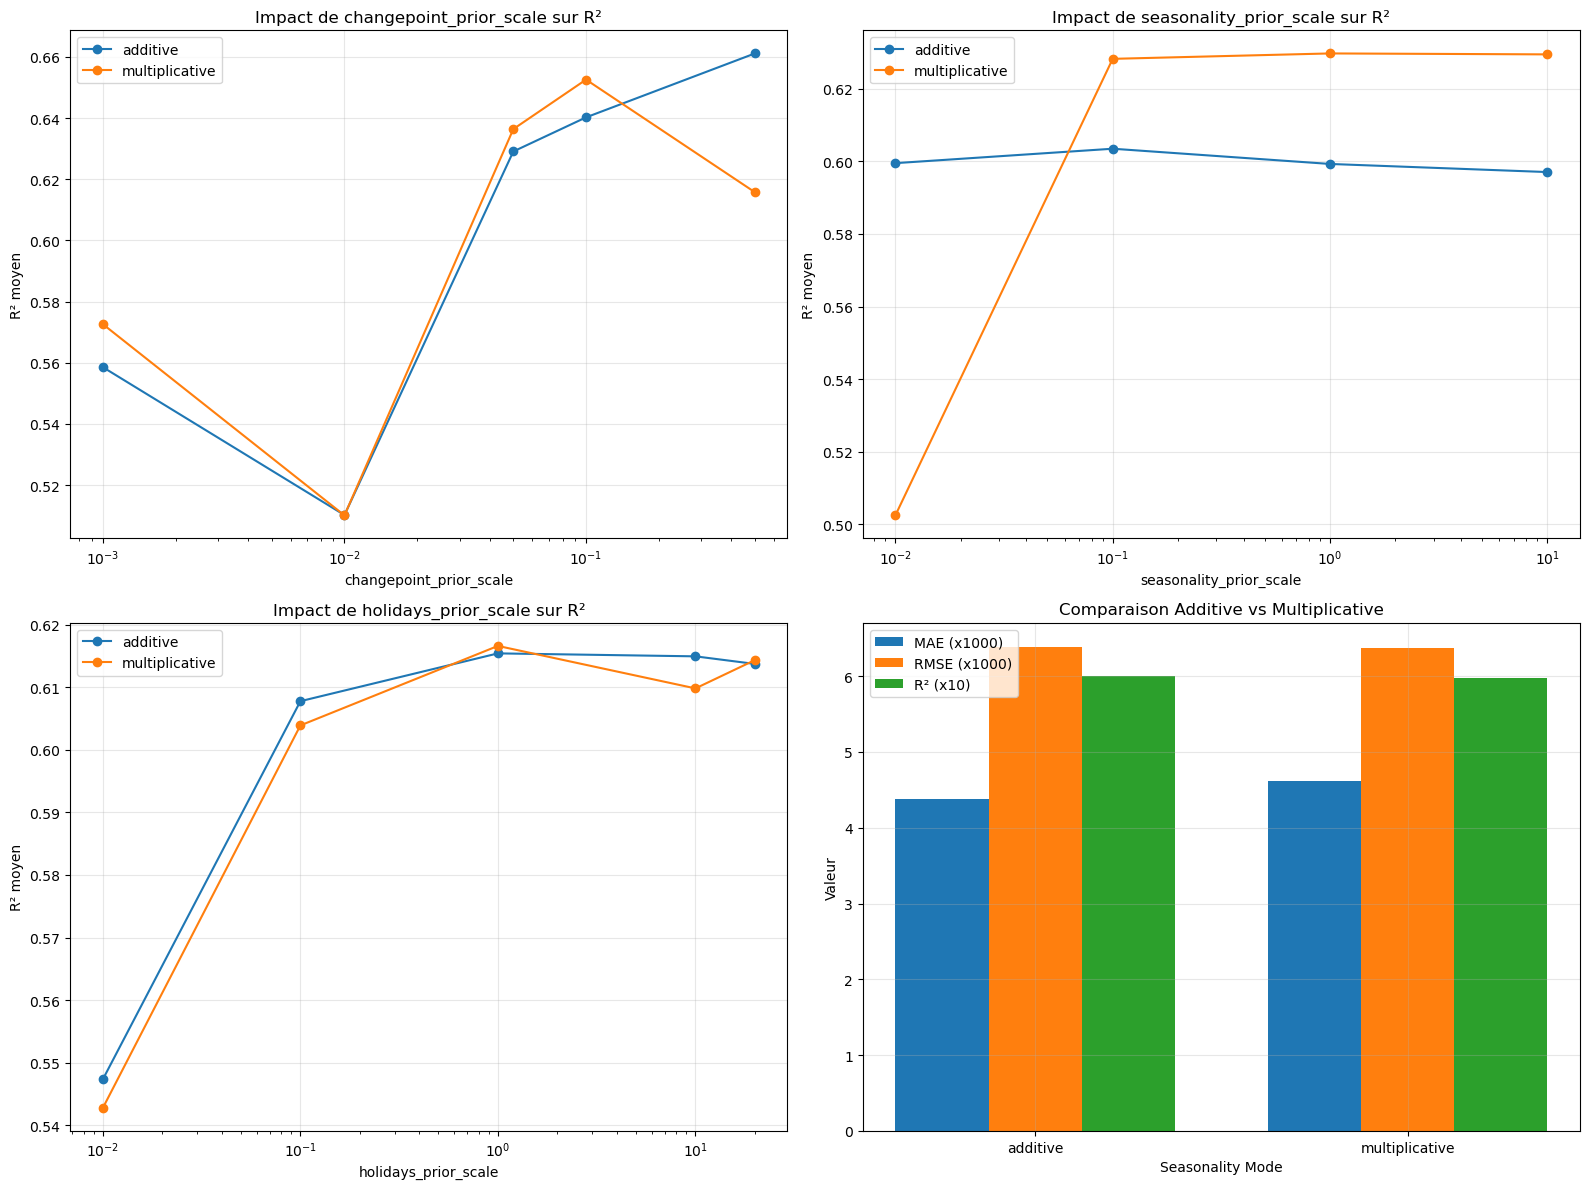


🎯 ENTRAÎNEMENT FINAL AVEC MEILLEURS PARAMÈTRES


10:22:03 - cmdstanpy - INFO - Chain [1] start processing
10:22:04 - cmdstanpy - INFO - Chain [1] done processing



📊 PERFORMANCES FINALES :
MAE  : 3,633.10
RMSE : 5,165.86
R²   : 0.7396


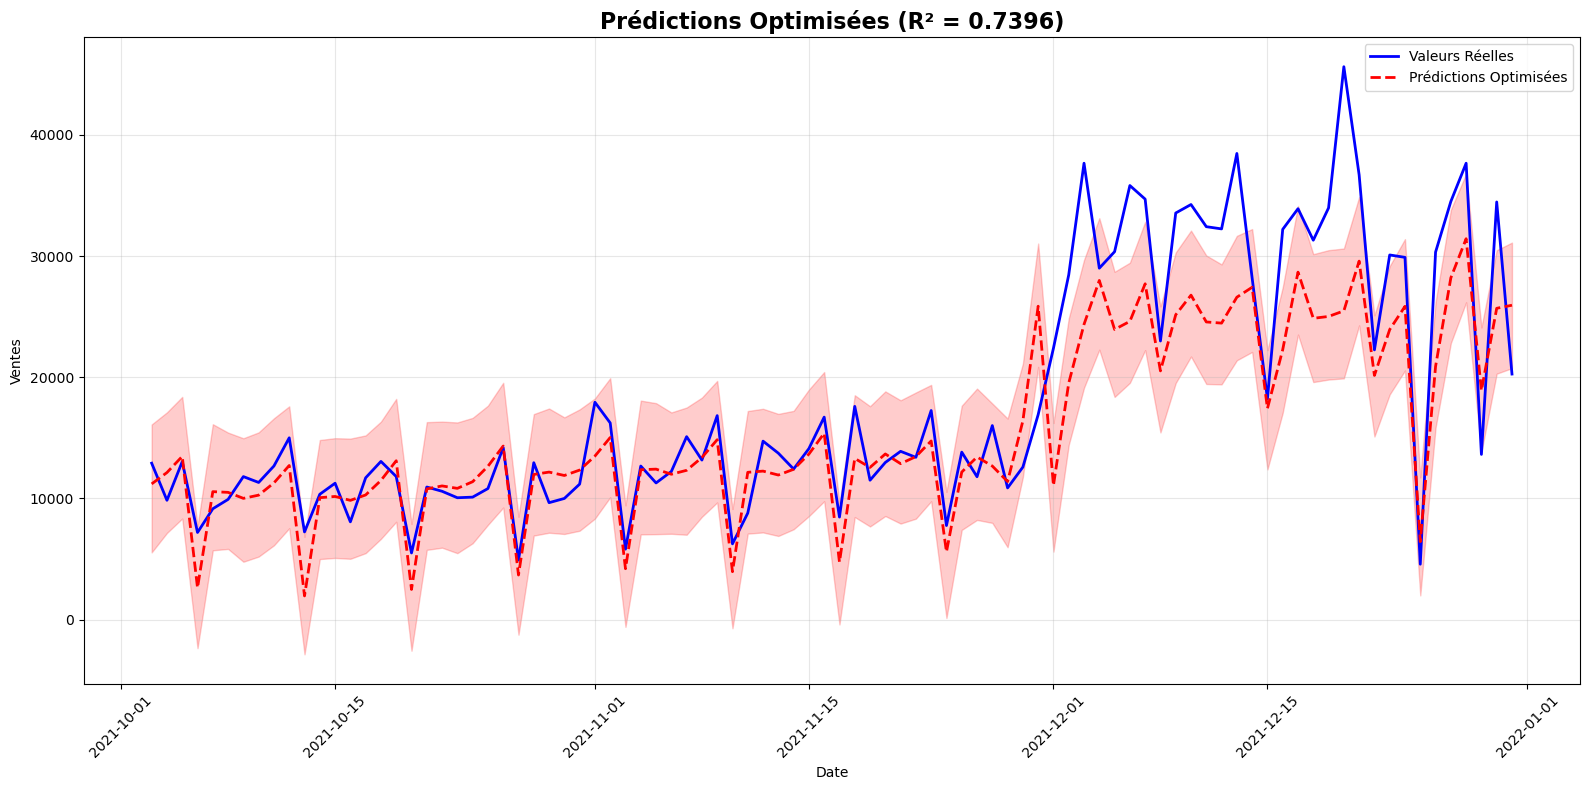


💾 MEILLEURS PARAMÈTRES À UTILISER :

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=0.1,
    holidays_prior_scale=20.0,
    seasonality_mode='multiplicative',
    interval_width=0.95
)



In [148]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. HOLIDAYS (même définition qu'avant)
# ========================================
holidays = pd.DataFrame({
    'holiday': [
        'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver', 'soldes_hiver',
        'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin', 'saint_valentin',
        'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres', 'fete_meres',
        'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete', 'soldes_ete',
        'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire', 'rentree_scolaire',
        'black_friday', 'black_friday', 'black_friday', 'black_friday', 'black_friday', 'black_friday',
        'noel', 'noel', 'noel', 'noel', 'noel', 'noel'
    ],
    'ds': pd.to_datetime([
        '2017-01-04', '2018-01-10', '2019-01-09', '2020-01-08', '2021-01-06', '2022-01-12',
        '2017-02-14', '2018-02-14', '2019-02-14', '2020-02-14', '2021-02-14', '2022-02-14',
        '2017-05-28', '2018-05-27', '2019-05-26', '2020-05-24', '2021-05-30', '2022-05-29',
        '2017-06-28', '2018-06-27', '2019-06-26', '2020-07-15', '2021-06-23', '2022-06-22',
        '2017-09-04', '2018-09-03', '2019-09-02', '2020-09-01', '2021-09-02', '2022-09-01',
        '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25',
        '2017-12-15', '2018-12-15', '2019-12-15', '2020-12-15', '2021-12-15', '2022-12-15'
    ]),
    'lower_window': [-5]*6 + [-3]*6 + [-7]*6 + [-3]*6 + [-10]*6 + [-7]*6 + [-10]*6,
    'upper_window': [42]*6 + [2]*6 + [5]*6 + [35]*6 + [25]*6 + [10]*6 + [16]*6
})

# ========================================
# 2. GRID SEARCH POUR PROPHET
# ========================================
print("🔍 DÉBUT DU GRID SEARCH...")
print("="*70)

# Grille de paramètres à tester
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0, 20.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Génération de toutes les combinaisons
all_params = [dict(zip(param_grid.keys(), v)) 
              for v in itertools.product(*param_grid.values())]

print(f"📊 Nombre total de combinaisons à tester : {len(all_params)}")

# Stockage des résultats
results = []

# Boucle sur toutes les combinaisons
for i, params in enumerate(all_params):
    try:
        # Créer le modèle avec les paramètres actuels
        m = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            holidays=holidays,
            changepoint_prior_scale=params['changepoint_prior_scale'],
            seasonality_prior_scale=params['seasonality_prior_scale'],
            holidays_prior_scale=params['holidays_prior_scale'],
            seasonality_mode=params['seasonality_mode'],
            interval_width=0.95
        )
        
        # Entraînement
        m.fit(train)
        
        # Prédiction sur test
        future = test[['ds']].copy()
        forecast = m.predict(future)
        
        # Fusion et calcul des métriques
        test_pred = test.merge(forecast[['ds', 'yhat']], on='ds', how='left')
        y_true = test_pred['y'].values
        y_pred = test_pred['yhat'].values
        
        # Métriques
        mae = mean_absolute_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        r2 = r2_score(y_true, y_pred)
        
        # Stockage
        results.append({
            **params,
            'mae': mae,
            'rmse': rmse,
            'r2': r2
        })
        
        # Affichage progression
        if (i + 1) % 20 == 0:
            print(f"✅ {i+1}/{len(all_params)} combinaisons testées...")
            
    except Exception as e:
        print(f"❌ Erreur avec params {params}: {e}")
        continue

# Conversion en DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("✅ GRID SEARCH TERMINÉ !")
print("="*70)

# ========================================
# 3. AFFICHAGE DES MEILLEURS PARAMÈTRES
# ========================================
# Tri par R² décroissant
results_df_sorted = results_df.sort_values('r2', ascending=False)

print("\n🏆 TOP 5 DES MEILLEURES COMBINAISONS (par R²) :")
print(results_df_sorted.head(10))

print("\n🥇 MEILLEURS PARAMÈTRES :")
best_params = results_df_sorted.iloc[0]
print(best_params)

# ========================================
# 4. CROSS-VALIDATION TEMPORELLE
# ========================================
print("\n" + "="*70)
print("🔄 CROSS-VALIDATION TEMPORELLE...")
print("="*70)

# Entraîner avec les meilleurs paramètres
best_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    interval_width=0.95
)

best_model.fit(train)

# Cross-validation
# initial: période d'entraînement initiale
# period: fréquence des validations
# horizon: horizon de prédiction
df_cv = cross_validation(
    best_model, 
    initial='730 days',  # 2 ans d'entraînement initial
    period='180 days',   # Validation tous les 6 mois
    horizon='90 days'    # Prédire 90 jours à l'avance
)

# Métriques de performance
df_p = performance_metrics(df_cv)

print("\n📊 MÉTRIQUES DE CROSS-VALIDATION :")
print(df_p[['horizon', 'mape', 'rmse', 'mae']].head(10))

print("\n📈 MOYENNES DES MÉTRIQUES :")
print(f"MAE moyen  : {df_p['mae'].mean():,.2f}")
print(f"RMSE moyen : {df_p['rmse'].mean():,.2f}")
print(f"MAPE moyen : {df_p['mape'].mean():.2%}")

# ========================================
# 5. VISUALISATION DES RÉSULTATS DU GRID SEARCH
# ========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Impact de changepoint_prior_scale
ax1 = axes[0, 0]
for mode in results_df['seasonality_mode'].unique():
    data = results_df[results_df['seasonality_mode'] == mode]
    grouped = data.groupby('changepoint_prior_scale')['r2'].mean()
    ax1.plot(grouped.index, grouped.values, marker='o', label=mode)
ax1.set_xlabel('changepoint_prior_scale')
ax1.set_ylabel('R² moyen')
ax1.set_title('Impact de changepoint_prior_scale sur R²')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Impact de seasonality_prior_scale
ax2 = axes[0, 1]
for mode in results_df['seasonality_mode'].unique():
    data = results_df[results_df['seasonality_mode'] == mode]
    grouped = data.groupby('seasonality_prior_scale')['r2'].mean()
    ax2.plot(grouped.index, grouped.values, marker='o', label=mode)
ax2.set_xlabel('seasonality_prior_scale')
ax2.set_ylabel('R² moyen')
ax2.set_title('Impact de seasonality_prior_scale sur R²')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Impact de holidays_prior_scale
ax3 = axes[1, 0]
for mode in results_df['seasonality_mode'].unique():
    data = results_df[results_df['seasonality_mode'] == mode]
    grouped = data.groupby('holidays_prior_scale')['r2'].mean()
    ax3.plot(grouped.index, grouped.values, marker='o', label=mode)
ax3.set_xlabel('holidays_prior_scale')
ax3.set_ylabel('R² moyen')
ax3.set_title('Impact de holidays_prior_scale sur R²')
ax3.set_xscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Comparaison additive vs multiplicative
ax4 = axes[1, 1]
mode_comparison = results_df.groupby('seasonality_mode')[['mae', 'rmse', 'r2']].mean()
x = np.arange(len(mode_comparison.index))
width = 0.25
ax4.bar(x - width, mode_comparison['mae']/1000, width, label='MAE (x1000)')
ax4.bar(x, mode_comparison['rmse']/1000, width, label='RMSE (x1000)')
ax4.bar(x + width, mode_comparison['r2']*10, width, label='R² (x10)')
ax4.set_xlabel('Seasonality Mode')
ax4.set_ylabel('Valeur')
ax4.set_title('Comparaison Additive vs Multiplicative')
ax4.set_xticks(x)
ax4.set_xticklabels(mode_comparison.index)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# 6. ENTRAÎNEMENT FINAL AVEC MEILLEURS PARAMÈTRES
# ========================================
print("\n" + "="*70)
print("🎯 ENTRAÎNEMENT FINAL AVEC MEILLEURS PARAMÈTRES")
print("="*70)

final_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    interval_width=0.95
)

final_model.fit(train)
future = test[['ds']].copy()
forecast_final = final_model.predict(future)

# Métriques finales
test_pred_final = test.merge(forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
                              on='ds', how='left')
y_true = test_pred_final['y'].values
y_pred = test_pred_final['yhat'].values

print(f"\n📊 PERFORMANCES FINALES :")
print(f"MAE  : {mean_absolute_error(y_true, y_pred):,.2f}")
print(f"RMSE : {mean_squared_error(y_true, y_pred, squared=False):,.2f}")
print(f"R²   : {r2_score(y_true, y_pred):.4f}")

# Comparaison Réel vs Prédit
plt.figure(figsize=(16, 8))
plt.plot(test_pred_final['ds'], test_pred_final['y'], 
         label='Valeurs Réelles', color='blue', linewidth=2)
plt.plot(test_pred_final['ds'], test_pred_final['yhat'], 
         label='Prédictions Optimisées', color='red', linewidth=2, linestyle='--')
plt.fill_between(test_pred_final['ds'], 
                 test_pred_final['yhat_lower'], 
                 test_pred_final['yhat_upper'], 
                 alpha=0.2, color='red')
plt.title(f'Prédictions Optimisées (R² = {r2_score(y_true, y_pred):.4f})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sauvegarder les meilleurs paramètres
print("\n💾 MEILLEURS PARAMÈTRES À UTILISER :")
print(f"""
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale={best_params['changepoint_prior_scale']},
    seasonality_prior_scale={best_params['seasonality_prior_scale']},
    holidays_prior_scale={best_params['holidays_prior_scale']},
    seasonality_mode='{best_params['seasonality_mode']}',
    interval_width=0.95
)
""")

In [178]:
import pandas as pd
import numpy as np
from prophet import Prophet

# ========================================
# CRÉER DES FEATURES ADDITIONNELLES
# ========================================

def add_regressors(df):
    """Ajoute des régresseurs pour améliorer les prédictions"""
    df = df.copy()
    
    # 1. Indicateurs temporels
    df['day_of_week'] = df['ds'].dt.dayofweek  # 0=Lundi, 6=Dimanche
    df['day_of_month'] = df['ds'].dt.day
    df['week_of_year'] = df['ds'].dt.isocalendar().week
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter
    df['is_weekend'] = (df['ds'].dt.dayofweek >= 5).astype(int)
    df['is_month_start'] = (df['ds'].dt.day <= 7).astype(int)
    df['is_month_end'] = (df['ds'].dt.day >= 24).astype(int)
    
    # 2. Moyennes mobiles (tendances récentes)
    # Attention : calculer SEULEMENT sur train pour éviter data leakage
    if 'y' in df.columns:
        df['ma_7'] = df['y'].rolling(window=7, min_periods=1).mean()
        df['ma_30'] = df['y'].rolling(window=30, min_periods=1).mean()
        df['lag_7'] = df['y'].shift(7)
        df['lag_30'] = df['y'].shift(30)
    
    # 3. Indicateurs de saison commerciale
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
    df['is_christmas_season'] = df['month'].isin([11, 12]).astype(int)
    df['is_back_to_school'] = ((df['month'] == 8) | ((df['month'] == 9) & (df['day_of_month'] <= 15))).astype(int)
    
    return df

# Appliquer sur train et test
train_enriched = add_regressors(train)
test_enriched = add_regressors(test)

# Pour test, on ne peut pas utiliser les valeurs futures de 'y'
# Donc on utilise les dernières valeurs connues de train
last_values = train_enriched[['ma_7', 'ma_30', 'lag_7', 'lag_30']].tail(1)
for col in ['ma_7', 'ma_30', 'lag_7', 'lag_30']:
    if col in test_enriched.columns:
        test_enriched[col].fillna(last_values[col].values[0], inplace=True)

# ========================================
# MODÈLE PROPHET AVEC RÉGRESSEURS
# ========================================

m_advanced = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=0.1,
    holidays_prior_scale=20.0,
    seasonality_mode='multiplicative',
    interval_width=0.95
)

# Ajouter les régresseurs
regressors = [
    'day_of_week', 'is_weekend', 'is_month_start', 'is_month_end',
    'is_summer', 'is_christmas_season', 'is_back_to_school',
    'quarter'
]

for reg in regressors:
    m_advanced.add_regressor(reg)

# Entraînement
m_advanced.fit(train_enriched)

# Prédiction
forecast_advanced = m_advanced.predict(test_enriched)

# Évaluation
test_pred_advanced = test.merge(
    forecast_advanced[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
    on='ds', how='left'
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

y_true = test_pred_advanced['y'].values
y_pred = test_pred_advanced['yhat'].values

print("📊 PERFORMANCES AVEC RÉGRESSEURS :")
print(f"MAE  : {mean_absolute_error(y_true, y_pred):,.2f}")
print(f"RMSE : {mean_squared_error(y_true, y_pred, squared=False):,.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")
print(f"R²   : {r2_score(y_true, y_pred):.4f}")

11:27:21 - cmdstanpy - INFO - Chain [1] start processing
11:27:23 - cmdstanpy - INFO - Chain [1] done processing


📊 PERFORMANCES AVEC RÉGRESSEURS :
MAE  : 3,548.39
RMSE : 5,098.37
MAPE : 18.70%
R²   : 0.7464


In [180]:
import joblib

joblib.dump(m_advanced, "prophet_model.pkl")

['prophet_model.pkl']

**Forecasting**

In [209]:
df = df_merged.copy()
df["ds"] = pd.to_datetime(df["Date Order was placed"])
df = df.rename(columns={"Total Retail Price for This Order": "y"})

# ventes quotidiennes par produit
df_prod = (
    df.groupby(["Product ID", "ds"], as_index=False)["y"]
      .sum()
)


In [217]:
top_products = (
    df_prod.groupby("Product ID")["y"].sum()
          .sort_values(ascending=False)
          .head(20)  # ex. top 20 produits historiques
          .index
)

forecasts = []

for pid in top_products:
    sub = df_prod[df_prod["Product ID"] == pid].copy()
    sub = add_regressors(sub)  # ta fonction, adaptée pour ce df

    m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=0.1,
    holidays_prior_scale=20.0,
    seasonality_mode='multiplicative',
    interval_width=0.95
    )
    for reg in regressors:
        m.add_regressor(reg)

    m.fit(sub)

    future = m.make_future_dataframe(periods=30, freq="D")  # ex. 30 jours
    future = add_regressors(future)
    fc = m.predict(future)
    fc["Product ID"] = pid
    forecasts.append(fc[["Product ID", "ds", "yhat"]])

forecast_all = pd.concat(forecasts, ignore_index=True)

# Somme des ventes prévues par produit sur la période future
summary = (
    forecast_all[forecast_all["ds"] > df["ds"].max()]
    .groupby("Product ID")["yhat"]
    .sum()
    .sort_values(ascending=False)
)

# Produits les plus vendus (forecast)
top_future_products = summary.head(10)


ValueError: Found NaN in column 'lag_7'

12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:44 - cmdstanpy - INFO - Chain [1] start processing
12:50:44 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:45 - cmdstanpy - INFO - Chain [1] start processing
12:50:45 - cmdstanpy - INFO - Chain [1] done processing
12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1] done processing
12:50:46 - cmdstanpy - INFO - Chain [1] start processing
12:50:46 - cmdstanpy - INFO - Chain [1]

Top 10 produits (ventes prédites sur les 30 prochains jours) :
Product Name
Top-form 325 Treadmill                 137432.196754
Letour Trimag Bike                      57893.236077
Letour Heart Bike                       53013.132774
Big Guy Men's Mountain Jacket           41177.422800
Mayday Trippler 3/4 Long Ski Jacket     40559.615957
Tx Peak Parka                           28577.080918
Family Holiday 4                        28044.634554
Family Holiday 6                        28037.755621
Men's Goretex Outdoor Jacket            26071.934903
Jeff's Hockey                           22401.933027
Name: yhat, dtype: float64


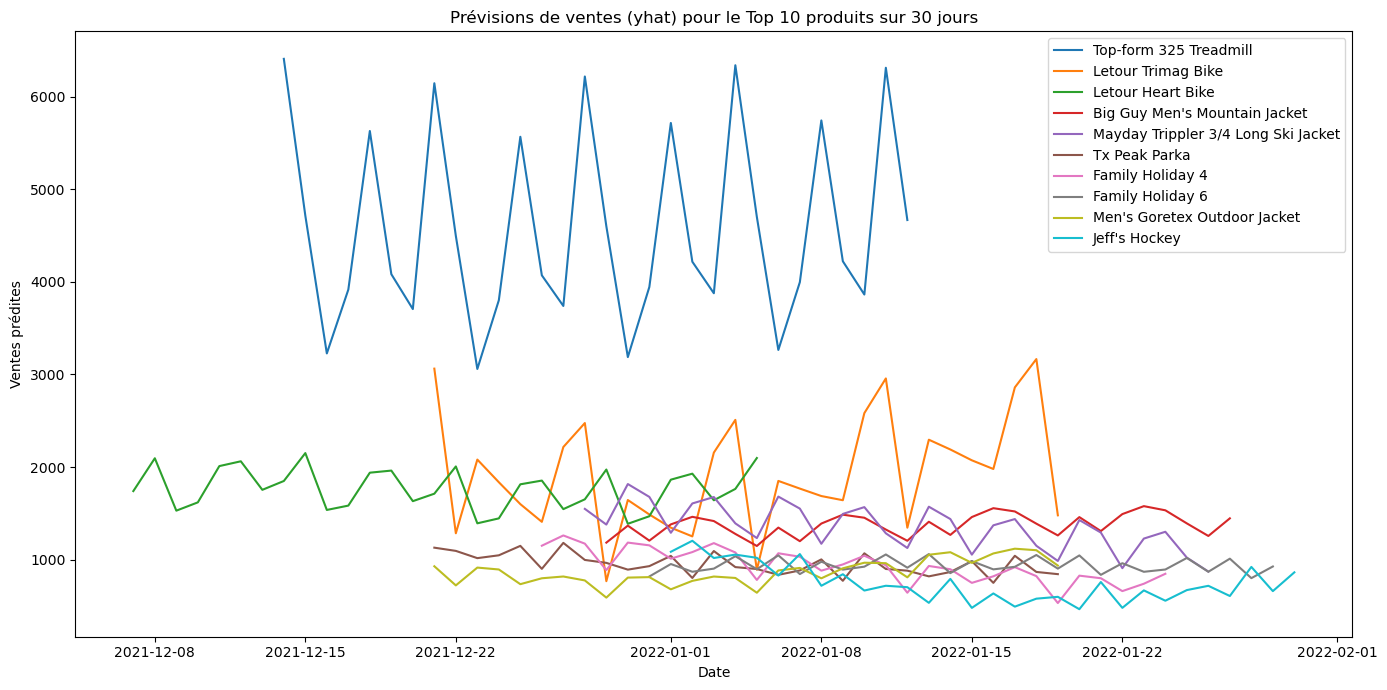

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# ========= 1) Charger et préparer =========
df = df_merged.copy()

df = df.rename(columns={
    "Date Order was placed": "ds",
    "Total Retail Price for This Order": "y"
})
df["ds"] = pd.to_datetime(df["ds"])

# Vérifier qu'on a bien une colonne produit
assert "Product Name" in df.columns, "Colonne 'Product Name' manquante dans df_merged"

# Agréger par produit + date (ventes quotidiennes par produit)
df_prod = (
    df.groupby(["Product Name", "ds"], as_index=False)["y"]
      .sum()
)

# ========= 2) Définir fonction pour ajouter quelques features simples =========
def add_basic_features(df):
    df = df.copy()
    df["day_of_week"] = df["ds"].dt.dayofweek
    df["month"] = df["ds"].dt.month
    df["is_weekend"] = (df["ds"].dt.dayofweek >= 5).astype(int)
    return df

# ========= 3) Boucler sur les produits et faire un forecast =========
# Pour éviter des modèles sur des produits avec 3 ventes, on filtre les produits
min_points = 30  # minimum de jours d'historique
product_counts = df_prod.groupby("Product Name")["ds"].count()
eligible_products = product_counts[product_counts >= min_points].index

# Optionnel : limiter au top N produits historiques pour aller plus vite
N_hist = 50
top_hist_products = (
    df_prod.groupby("Product Name")["y"]
           .sum()
           .sort_values(ascending=False)
           .head(N_hist)
           .index
)

product_list = [p for p in eligible_products if p in top_hist_products]

all_forecasts = []  # on stocke ici les prévisions de tous les produits

horizon = 30  # nb de jours à prévoir

for pid in product_list:
    sub = df_prod[df_prod["Product Name"] == pid].copy()
    sub = add_basic_features(sub)

    # Prophet demande ds, y (+ régressseurs éventuels)
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        interval_width=0.95
    )
    # Exemple : on ajoute seulement day_of_week, is_weekend comme régressseurs simples
    m.add_regressor("day_of_week")
    m.add_regressor("is_weekend")

    m.fit(sub[["ds", "y", "day_of_week", "is_weekend"]])

    future = m.make_future_dataframe(periods=horizon, freq="D")
    future = add_basic_features(future)

    forecast = m.predict(future)

    # On garde seulement l'horizon futur
    forecast_future = forecast[forecast["ds"] > sub["ds"].max()].copy()
    forecast_future["Product Name"] = pid

    all_forecasts.append(forecast_future[["Product Name", "ds", "yhat"]])

# Concat de toutes les prévisions
forecast_all = pd.concat(all_forecasts, ignore_index=True)

# ========= 4) Calculer les ventes prédites totales par produit sur l'horizon =========
future_sales_by_product = (
    forecast_all.groupby("Product Name")["yhat"]
                .sum()
                .sort_values(ascending=False)
)

top_10_future = future_sales_by_product.head(10)
print("Top 10 produits (ventes prédites sur les", horizon, "prochains jours) :")
print(top_10_future)

# ========= 5) Visualiser les courbes pour le Top 10 =========
top10_ids = top_10_future.index.tolist()

plt.figure(figsize=(14, 7))
for pid in top10_ids:
    sub_fc = forecast_all[forecast_all["Product Name"] == pid]
    plt.plot(sub_fc["ds"], sub_fc["yhat"], label=str(pid))

plt.title(f"Prévisions de ventes (yhat) pour le Top 10 produits sur {horizon} jours")
plt.xlabel("Date")
plt.ylabel("Ventes prédites")
plt.legend()
plt.tight_layout()
plt.show()


**Modèle 1: ARIMA**

Analyse ACF et PACF pour la Sélection des Paramètres

In [35]:
from statsmodels.tsa.stattools import adfuller

# Test de stationnarité (ADF test)
#Par défaut, la fonction adfuller() de statsmodels utilise un modèle AVEC constante mais SANS tendance.
adf_result = adfuller(train)
print("Test de Stationnarité (ADF) :")
#ADF Statistic = γ / erreur standard(γ)
print(f"ADF Statistic: {adf_result[0]:.6f}")
print(f"P-value: {adf_result[1]:.6f}")
if adf_result[1] < 0.05:
    print("Série stationnaire (rejeter H0)")
else:
    print("Série non-stationnaire (accepter H0)")

Test de Stationnarité (ADF) :
ADF Statistic: -4.240610
P-value: 0.000562
Série stationnaire (rejeter H0)


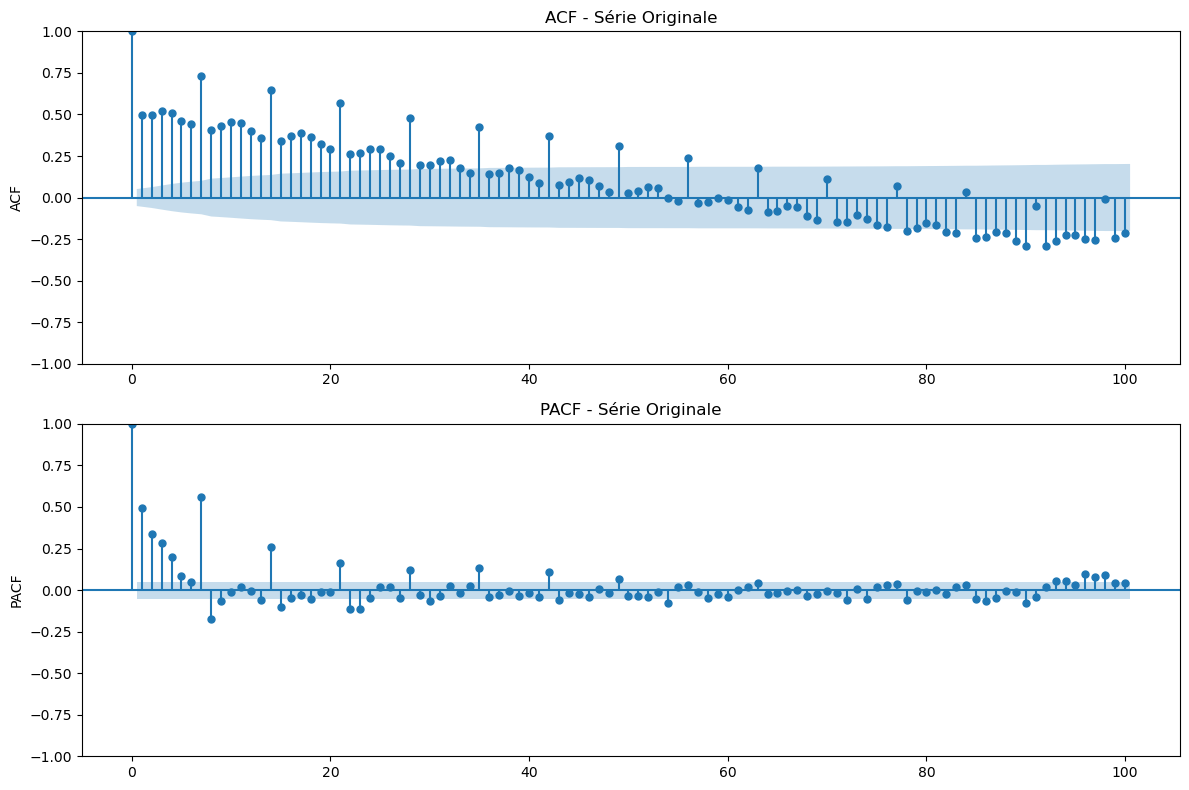

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Visualisation ACF et PACF pour la série originale
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(train.dropna(), lags=100, ax=axes[0])
axes[0].set_title('ACF - Série Originale')
axes[0].set_ylabel('ACF')

# PACF
plot_pacf(train.dropna(), lags=100, ax=axes[1], method='ywmle')
axes[1].set_title('PACF - Série Originale')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

In [37]:
from statsmodels.tsa.stattools import kpss
kpss_result = kpss(train, regression='c')
print("Test KPSS (H0: série stationnaire)")
print(f"KPSS Statistic: {kpss_result[0]:.6f}")
print(f"P-value: {kpss_result[1]:.6f}")
if kpss_result[1] > 0.05:
    print("KPSS dit: Stationnaire")
else:
    print("KPSS dit: Non-stationnaire")

Test KPSS (H0: série stationnaire)
KPSS Statistic: 0.697729
P-value: 0.013752
KPSS dit: Non-stationnaire


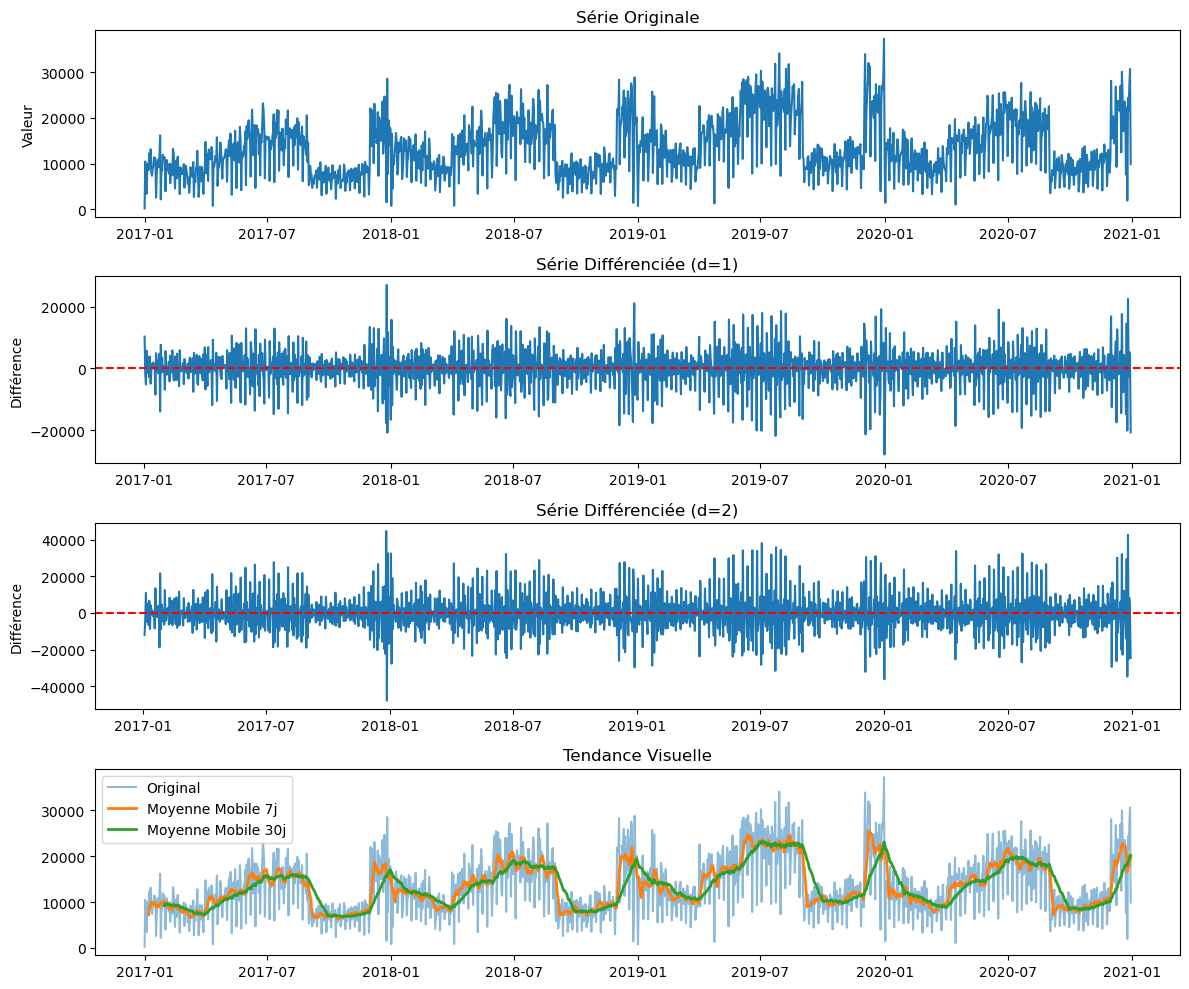


ADF sur série différenciée
P-value: 0.000000


In [38]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# 1. Série originale
axes[0].plot(train)
axes[0].set_title('Série Originale')
axes[0].set_ylabel('Valeur')

# 2. Série différenciée (d=1)
diff_series = train.diff().dropna()
axes[1].plot(diff_series)
axes[1].set_title('Série Différenciée (d=1)')
axes[1].set_ylabel('Différence')
axes[1].axhline(y=0, color='r', linestyle='--')

# 2. Série différenciée (d=2)
diff_series_2 = train.diff().diff().dropna()
axes[2].plot(diff_series_2)
axes[2].set_title('Série Différenciée (d=2)')
axes[2].set_ylabel('Différence')
axes[2].axhline(y=0, color='r', linestyle='--')

# 3. Comparaison des moyennes mobiles
axes[3].plot(train, label='Original', alpha=0.5)
axes[3].plot(train.rolling(window=7).mean(), label='Moyenne Mobile 7j', linewidth=2)
axes[3].plot(train.rolling(window=30).mean(), label='Moyenne Mobile 30j', linewidth=2)
axes[3].set_title('Tendance Visuelle')
axes[3].legend()

plt.tight_layout()
plt.show()

# Test ADF sur série différenciée
adf_diff = adfuller(diff_series)
print(f"\nADF sur série différenciée")
print(f"P-value: {adf_diff[1]:.6f}")

In [39]:
adf_result = adfuller(diff_series)
print("Test de Stationnarité (ADF) :")
#ADF Statistic = γ / erreur standard(γ)
print(f"ADF Statistic: {adf_result[0]:.6f}")
print(f"P-value: {adf_result[1]:.6f}")
if adf_result[1] < 0.05:
    print("Série stationnaire (rejeter H0)")
else:
    print("Série non-stationnaire (accepter H0)")

Test de Stationnarité (ADF) :
ADF Statistic: -7.963454
P-value: 0.000000
Série stationnaire (rejeter H0)


In [40]:
kpss_result = kpss(diff_series, regression='c')
print("Test KPSS (H0: série stationnaire)")
print(f"KPSS Statistic: {kpss_result[0]:.6f}")
print(f"P-value: {kpss_result[1]:.6f}")
if kpss_result[1] > 0.05:
    print("KPSS dit: Stationnaire")
else:
    print("KPSS dit: Non-stationnaire")

Test KPSS (H0: série stationnaire)
KPSS Statistic: 0.084167
P-value: 0.100000
KPSS dit: Stationnaire


C:\Users\HP\AppData\Local\Temp\ipykernel_12820\3739566465.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(diff_series, regression='c')


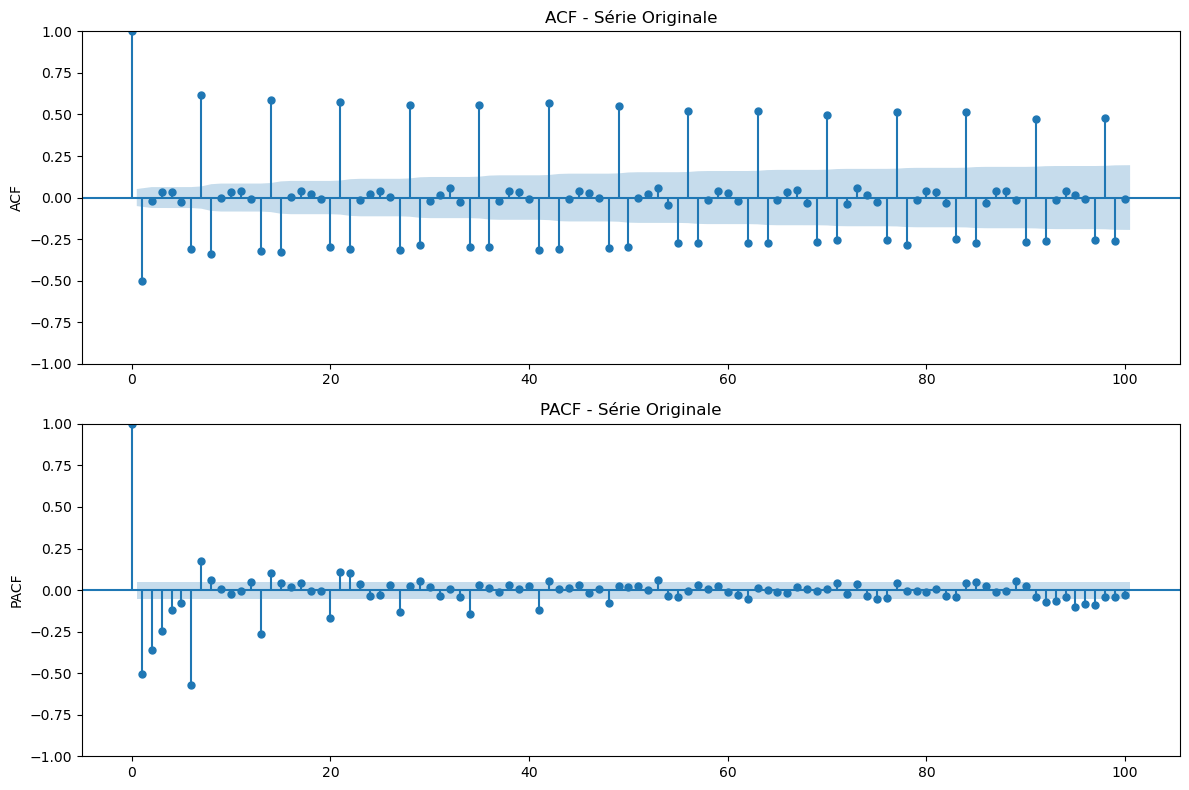

In [41]:
# Visualisation ACF et PACF pour la série originale
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(diff_series.dropna(), lags=100, ax=axes[0])
axes[0].set_title('ACF - Série Originale')
axes[0].set_ylabel('ACF')

# PACF
plot_pacf(diff_series.dropna(), lags=100, ax=axes[1], method='ywmle')
axes[1].set_title('PACF - Série Originale')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

**Sélection Automatique des Paramètres ARIMA/SARIMA**

🔍 ANALYSE SARIMA COMPLÈTE
1. DÉTERMINATION DE d et D
------------------------------
Série originale - p-value: 0.0006
Différence 1ère (d=1) - p-value: 0.0000
Différence saisonnière (D=1) - p-value: 0.0000
Différence 1ère (d=1) - p-value: 0.0000
Différence saisonnière (D=1) - p-value: 0.0000
Différence 1ère + saisonnière - p-value: 0.0000
✅ d=1, D=1 (série stationnaire avec les deux différenciations)

2. DÉTERMINATION DE p, q, P, Q
------------------------------
Différence 1ère + saisonnière - p-value: 0.0000
✅ d=1, D=1 (série stationnaire avec les deux différenciations)

2. DÉTERMINATION DE p, q, P, Q
------------------------------


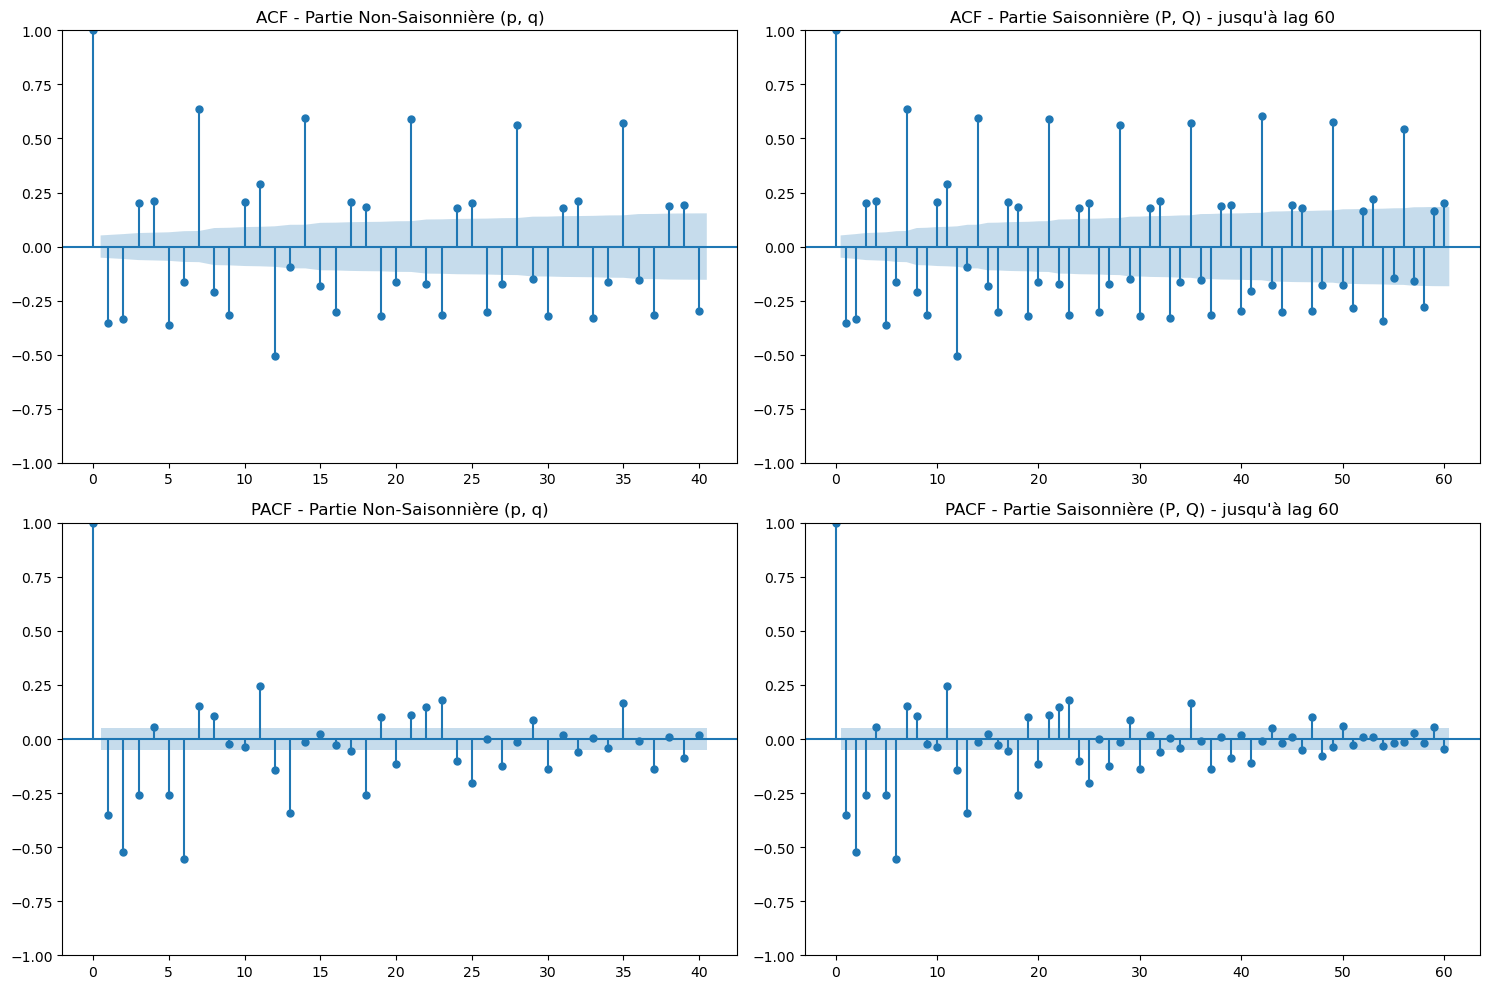


3. RÈGLES DE DÉTERMINATION DES PARAMÈTRES
----------------------------------------
📊 Paramètres suggérés:
   Non-saisonniers: p=5, d=1, q=5
   Saisonniers: P=1, D=1, Q=1, m=12


In [42]:
import warnings
warnings.filterwarnings('ignore')

# Supposons que 'data' est votre série temporelle
# et que vous savez déjà que m=12 (saisonnalité annuelle)
m = 12  # Période saisonnière (à adapter)

def analyse_sarima_complete(serie, m):
    """
    Analyse complète pour déterminer tous les paramètres SARIMA
    """
    print("🔍 ANALYSE SARIMA COMPLÈTE")
    print("=" * 50)
    
    # 1. DIFFÉRENCIATION - Déterminer d et D
    print("1. DÉTERMINATION DE d et D")
    print("-" * 30)
    
    # Test sur série originale
    adf_orig = adfuller(serie.dropna())
    print(f"Série originale - p-value: {adf_orig[1]:.4f}")
    
    # Différenciation simple (d=1)
    diff1 = serie.diff().dropna()
    adf_diff1 = adfuller(diff1)
    print(f"Différence 1ère (d=1) - p-value: {adf_diff1[1]:.4f}")
    
    # Différenciation saisonnière (D=1)
    diff_seasonal = serie.diff(m).dropna()
    adf_seasonal = adfuller(diff_seasonal)
    print(f"Différence saisonnière (D=1) - p-value: {adf_seasonal[1]:.4f}")
    
    # Différenciation simple + saisonnière (d=1, D=1)
    diff_both = serie.diff().diff(m).dropna()
    adf_both = adfuller(diff_both)
    print(f"Différence 1ère + saisonnière - p-value: {adf_both[1]:.4f}")
    
    # Détermination de d et D
    if adf_both[1] < 0.05:
        d, D = 1, 1
        print(f"✅ d={d}, D={D} (série stationnaire avec les deux différenciations)")
    elif adf_diff1[1] < 0.05:
        d, D = 1, 0
        print(f"✅ d={d}, D={D} (série stationnaire avec différence simple seulement)")
    else:
        d, D = 0, 0
        print("❌ Série non-stationnaire même après différenciation")
    
    # 2. ANALYSE ACF/PACF - Déterminer p, q, P, Q
    print("\n2. DÉTERMINATION DE p, q, P, Q")
    print("-" * 30)
    
    # Série à analyser (après différenciation)
    if d == 1 and D == 1:
        serie_analyse = diff_both
    elif d == 1:
        serie_analyse = diff1
    else:
        serie_analyse = serie
    
    # Graphiques ACF/PACF
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # ACF/PACF normaux (pour p et q)
    plot_acf(serie_analyse, ax=axes[0,0], lags=min(40, len(serie_analyse)//4), title='ACF - Partie Non-Saisonnière (p, q)')
    plot_pacf(serie_analyse, ax=axes[1,0], lags=min(40, len(serie_analyse)//4), title='PACF - Partie Non-Saisonnière (p, q)')
    
    # ACF/PACF avec plus de lags (pour P et Q)
    max_lags = min(5*m, len(serie_analyse)//3)
    plot_acf(serie_analyse, ax=axes[0,1], lags=max_lags, title=f'ACF - Partie Saisonnière (P, Q) - jusqu\'à lag {max_lags}')
    plot_pacf(serie_analyse, ax=axes[1,1], lags=max_lags, title=f'PACF - Partie Saisonnière (P, Q) - jusqu\'à lag {max_lags}')
    
    plt.tight_layout()
    plt.show()
    
    # 3. RÈGLES POUR DÉTERMINER LES PARAMÈTRES
    print("\n3. RÈGLES DE DÉTERMINATION DES PARAMÈTRES")
    print("-" * 40)
    
    # Calculer ACF et PACF pour analyse automatique
    from statsmodels.tsa.stattools import acf, pacf
    
    lags_acf = acf(serie_analyse, nlags=min(40, len(serie_analyse)//4))
    lags_pacf = pacf(serie_analyse, nlags=min(40, len(serie_analyse)//4))
    
    # Seuil de significativité (approximatif)
    seuil = 1.96 / np.sqrt(len(serie_analyse))
    
    # Déterminer p (PACF - coupure après p lags)
    p = 0
    for i in range(1, min(6, len(lags_pacf))):
        if abs(lags_pacf[i]) > seuil:
            p = i
        else:
            break
    
    # Déterminer q (ACF - coupure après q lags)
    q = 0
    for i in range(1, min(6, len(lags_acf))):
        if abs(lags_acf[i]) > seuil:
            q = i
        else:
            break
    
    # Déterminer P et Q (pic au lag m dans ACF/PACF)
    lags_acf_long = acf(serie_analyse, nlags=min(5*m, len(serie_analyse)//3))
    lags_pacf_long = pacf(serie_analyse, nlags=min(5*m, len(serie_analyse)//3))
    
    P = 1 if m < len(lags_pacf_long) and abs(lags_pacf_long[m]) > seuil else 0
    Q = 1 if m < len(lags_acf_long) and abs(lags_acf_long[m]) > seuil else 0
    
    print(f"📊 Paramètres suggérés:")
    print(f"   Non-saisonniers: p={p}, d={d}, q={q}")
    print(f"   Saisonniers: P={P}, D={D}, Q={Q}, m={m}")
    
    return (p, d, q), (P, D, Q, m)

# Application sur vos données
order, seasonal_order = analyse_sarima_complete(train, m=12)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA pour saisonnalité
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(len(test))

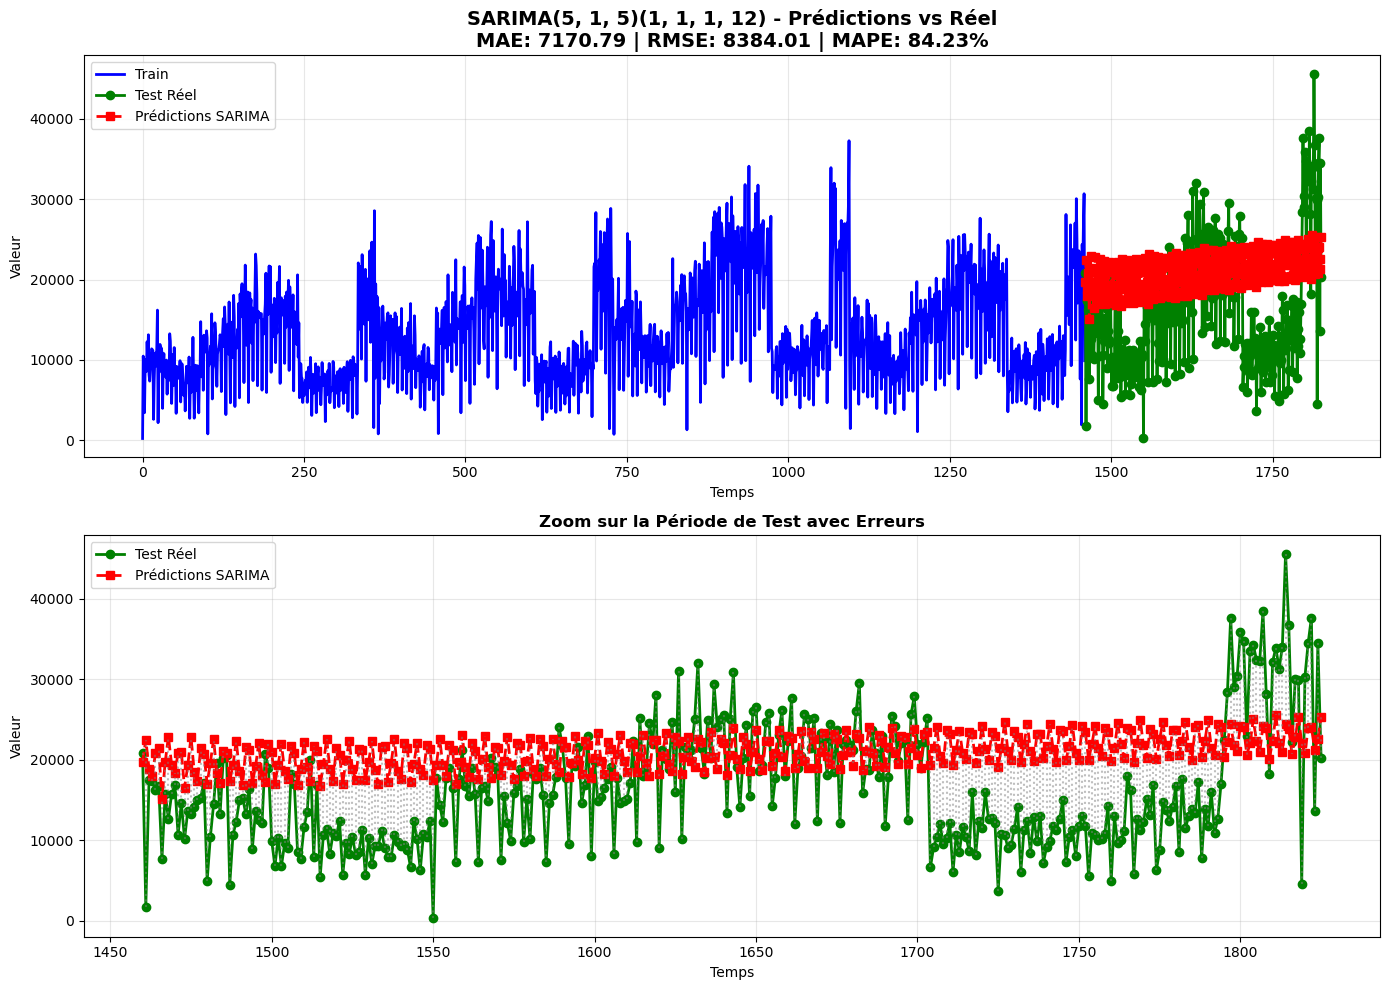

📊 MÉTRIQUES DE PERFORMANCE:
MAE (Mean Absolute Error): 7170.7930
RMSE (Root Mean Square Error): 8384.0106
MAPE (Mean Absolute Percentage Error): 84.23%


In [44]:
def visualiser_predictions_sarima(train, test, sarima_forecast, model_order, seasonal_order):
    """
    Visualise les prédictions SARIMA vs valeurs réelles
    """
    
    # Calcul des métriques d'erreur
    mae = mean_absolute_error(test, sarima_forecast)
    rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
    mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100
    
    # Création de la figure
    plt.figure(figsize=(14, 10))
    
    # Graphique 1: Série complète avec prédictions
    plt.subplot(2, 1, 1)
    
    # Indices pour l'affichage
    train_index = range(len(train))
    test_index = range(len(train), len(train) + len(test))
    
    # Tracer les données
    plt.plot(train_index, train, label='Train', color='blue', linewidth=2)
    plt.plot(test_index, test, label='Test Réel', color='green', linewidth=2, marker='o')
    plt.plot(test_index, sarima_forecast, label='Prédictions SARIMA', 
             color='red', linewidth=2, linestyle='--', marker='s')
    
    plt.title(f'SARIMA{model_order}{seasonal_order} - Prédictions vs Réel\n'
              f'MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Graphique 2: Zoom sur la période de test
    plt.subplot(2, 1, 2)
    
    plt.plot(test_index, test, label='Test Réel', color='green', linewidth=2, marker='o')
    plt.plot(test_index, sarima_forecast, label='Prédictions SARIMA', 
             color='red', linewidth=2, linestyle='--', marker='s')
    
    # Ajouter les erreurs
    for i, (real, pred) in enumerate(zip(test, sarima_forecast)):
        plt.plot([test_index[i], test_index[i]], [real, pred], 
                color='gray', alpha=0.5, linestyle=':')
    
    plt.title('Zoom sur la Période de Test avec Erreurs', fontsize=12, fontweight='bold')
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return mae, rmse, mape

# Utilisation avec votre code existant
mae, rmse, mape = visualiser_predictions_sarima(
    train=train, 
    test=test, 
    sarima_forecast=sarima_forecast,
    model_order=order,
    seasonal_order=seasonal_order
)

print("📊 MÉTRIQUES DE PERFORMANCE:")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

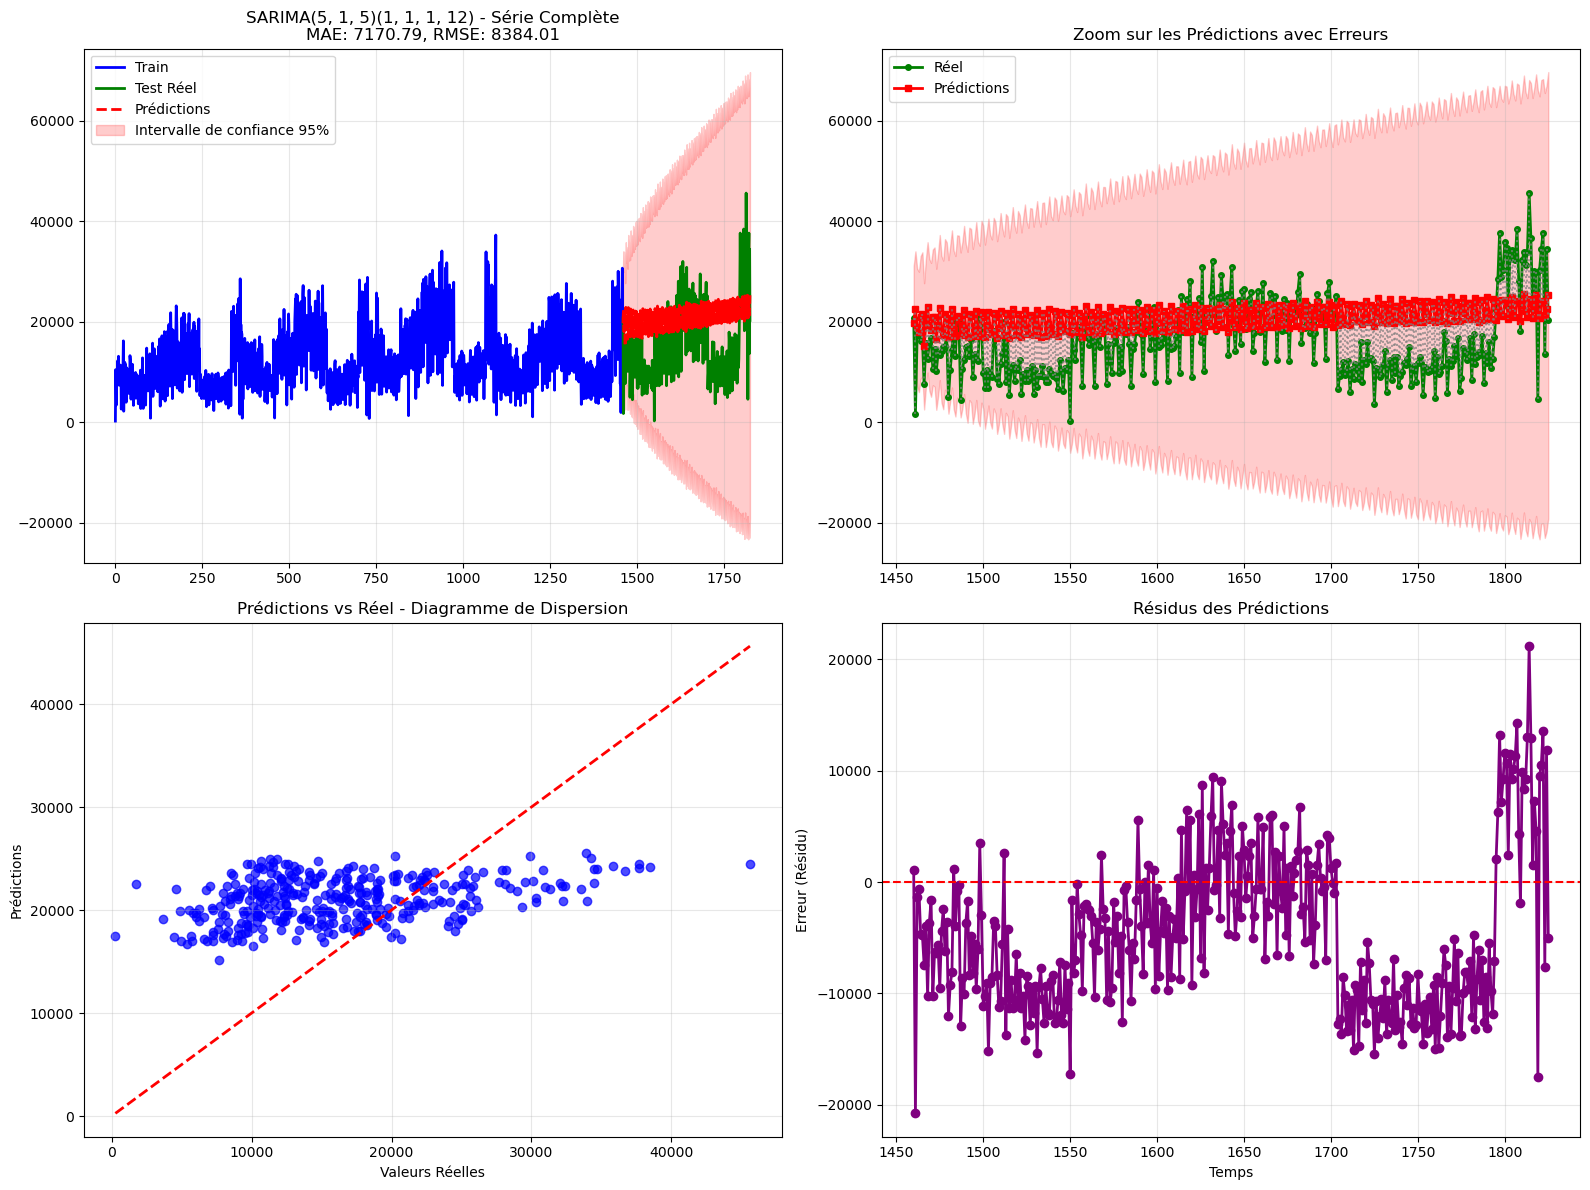

📈 RAPPORT DÉTAILLÉ DES PERFORMANCES
Modèle: SARIMA(5, 1, 5)(1, 1, 1, 12)
Période de test: 366 observations
MAE:  7170.7930
RMSE: 8384.0106
MAPE: 84.23%
Biais moyen: -4715.4911


In [45]:
def visualisation_avancee_sarima(train, test, sarima_fit, sarima_forecast, order, seasonal_order):
    """
    Visualisation avancée avec intervalles de confiance et diagnostics
    """
    # Obtenir les intervalles de confiance
    forecast_ci = sarima_fit.get_forecast(steps=len(test)).conf_int()
    
    # Calcul des métriques
    mae = mean_absolute_error(test, sarima_forecast)
    rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
    
    # Création de la figure
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Graphique 1: Série complète
    train_index = range(len(train))
    test_index = range(len(train), len(train) + len(test))
    
    axes[0, 0].plot(train_index, train, label='Train', color='blue', linewidth=2)
    axes[0, 0].plot(test_index, test, label='Test Réel', color='green', linewidth=2)
    axes[0, 0].plot(test_index, sarima_forecast, label='Prédictions', 
                    color='red', linewidth=2, linestyle='--')
    
    # Intervalles de confiance
    axes[0, 0].fill_between(test_index, 
                           forecast_ci.iloc[:, 0], 
                           forecast_ci.iloc[:, 1], 
                           color='red', alpha=0.2, label='Intervalle de confiance 95%')
    
    axes[0, 0].set_title(f'SARIMA{order}{seasonal_order} - Série Complète\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Graphique 2: Zoom sur les prédictions
    axes[0, 1].plot(test_index, test, label='Réel', color='green', 
                   linewidth=2, marker='o', markersize=4)
    axes[0, 1].plot(test_index, sarima_forecast, label='Prédictions', 
                   color='red', linewidth=2, marker='s', markersize=4)
    axes[0, 1].fill_between(test_index, 
                           forecast_ci.iloc[:, 0], 
                           forecast_ci.iloc[:, 1], 
                           color='red', alpha=0.2)
    
    # Tracer les erreurs
    for i in range(len(test)):
        axes[0, 1].plot([test_index[i], test_index[i]], 
                       [test.iloc[i], sarima_forecast.iloc[i]], 
                       color='gray', linestyle=':', alpha=0.7)
    
    axes[0, 1].set_title('Zoom sur les Prédictions avec Erreurs')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Graphique 3: Diagramme de dispersion Prédictions vs Réel
    axes[1, 0].scatter(test, sarima_forecast, alpha=0.7, color='blue')
    min_val = min(test.min(), sarima_forecast.min())
    max_val = max(test.max(), sarima_forecast.max())
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    axes[1, 0].set_xlabel('Valeurs Réelles')
    axes[1, 0].set_ylabel('Prédictions')
    axes[1, 0].set_title('Prédictions vs Réel - Diagramme de Dispersion')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Graphique 4: Résidus des prédictions
    residus = test - sarima_forecast
    axes[1, 1].plot(test_index, residus, color='purple', linewidth=2, marker='o')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('Temps')
    axes[1, 1].set_ylabel('Erreur (Résidu)')
    axes[1, 1].set_title('Résidus des Prédictions')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les métriques détaillées
    print("📈 RAPPORT DÉTAILLÉ DES PERFORMANCES")
    print("=" * 50)
    print(f"Modèle: SARIMA{order}{seasonal_order}")
    print(f"Période de test: {len(test)} observations")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {np.mean(np.abs(residus/test)) * 100:.2f}%")
    print(f"Biais moyen: {np.mean(residus):.4f}")
    
    return residus

# Utilisation de la version avancée
residus = visualisation_avancee_sarima(
    train=train,
    test=test, 
    sarima_fit=sarima_fit,
    sarima_forecast=sarima_forecast,
    order=order,
    seasonal_order=seasonal_order
)

In [46]:
!pip install pmdarima

In [47]:
# Installer / mettre à jour pmdarima de manière sûre depuis Python
import subprocess
import sys

try:
    import pmdarima as pm
    print('pmdarima déjà installé')
except Exception:
    print('Installation / mise à jour de pmdarima en cours...')
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pmdarima", "-q"]) 
    import pmdarima as pm
    print('pmdarima installé/mis à jour avec succès')


pmdarima déjà installé


In [48]:
# import pmdarima as pm
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import warnings
# warnings.filterwarnings('ignore')

# def auto_sarima_optimisation(train, test, m=12, seasonal=True):
#     """
#     Optimisation automatique avec Auto-SARIMA et visualisations complètes
#     """
#     print("🔄 LANCEMENT DE L'OPTIMISATION AUTO-SARIMA...")
#     print("=" * 60)
    
#     # 1. Recherche automatique du meilleur modèle
#     auto_model = pm.auto_arima(
#         train,
#         seasonal=seasonal,
#         m=m,
#         start_p=0, start_q=0,
#         max_p=5, max_q=5,
#         start_P=0, start_Q=0,
#         max_P=2, max_Q=2,
#         d=None, D=None,  # Test automatique
#         trace=True,
#         error_action='ignore',
#         suppress_warnings=True,
#         stepwise=True,
#         information_criterion='aic',
#         n_fits=50
#     )
    
#     print("\n✅ MODÈLE OPTIMAL TROUVÉ:")
#     print(auto_model.summary())
    
#     # 2. Prévisions avec le modèle optimal
#     forecast, conf_int = auto_model.predict(
#         n_periods=len(test),
#         return_conf_int=True
#     )
    
#     # 3. Calcul des métriques détaillées
#     mae = mean_absolute_error(test, forecast)
#     rmse = np.sqrt(mean_squared_error(test, forecast))
#     mape = np.mean(np.abs((test - forecast) / test)) * 100
#     bias = np.mean(test - forecast)
    
#     # 4. VISUALISATIONS COMPLÈTES
#     visualiser_resultats_auto_sarima(
#         train, test, forecast, conf_int, auto_model, 
#         mae, rmse, mape, bias
#     )
    
#     return auto_model, forecast, conf_int

# def visualiser_resultats_auto_sarima(train, test, forecast, conf_int, model, 
#                                    mae, rmse, mape, bias):
#     """
#     Visualisations complètes des résultats Auto-SARIMA
#     """
#     # Création de la figure principale
#     fig = plt.figure(figsize=(20, 16))
    
#     # 1. Série complète avec prédictions
#     plt.subplot(3, 2, 1)
    
#     train_index = range(len(train))
#     test_index = range(len(train), len(train) + len(test))
    
#     # Tracer les données
#     plt.plot(train_index, train, label='Entraînement', color='blue', linewidth=1.5, alpha=0.8)
#     plt.plot(test_index, test, label='Test Réel', color='green', linewidth=2, marker='o', markersize=3)
#     plt.plot(test_index, forecast, label='Prédictions Auto-SARIMA', 
#              color='red', linewidth=2, linestyle='--')
    
#     # Intervalles de confiance
#     plt.fill_between(test_index, 
#                     conf_int[:, 0], conf_int[:, 1],
#                     color='red', alpha=0.2, label='Intervalle confiance 95%')
    
#     plt.title(f'Auto-SARIMA Optimal - Performance Globale\n'
#               f'MAE: {mae:.0f} | RMSE: {rmse:.0f} | MAPE: {mape:.1f}%', 
#               fontsize=14, fontweight='bold')
#     plt.xlabel('Temps')
#     plt.ylabel('Valeur')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
    
#     # 2. Zoom sur les prédictions avec erreurs
#     plt.subplot(3, 2, 2)
    
#     plt.plot(test_index, test, label='Réel', color='green', 
#              linewidth=2, marker='o', markersize=4)
#     plt.plot(test_index, forecast, label='Prédictions', 
#              color='red', linewidth=2, marker='s', markersize=4)
#     plt.fill_between(test_index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2)
    
#     # Tracer les erreurs
#     for i in range(len(test)):
#         plt.plot([test_index[i], test_index[i]], 
#                 [test.iloc[i], forecast.iloc[i]], 
#                 color='gray', linestyle=':', alpha=0.5)
    
#     plt.title(f'Zoom Prédictions - Biais: {bias:.0f}', fontweight='bold')
#     plt.xlabel('Temps')
#     plt.ylabel('Valeur')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
    
#     # 3. Diagramme de dispersion Prédictions vs Réel
#     plt.subplot(3, 2, 3)
    
#     plt.scatter(test, forecast, alpha=0.6, color='blue', s=50)
#     min_val = min(test.min(), forecast.min())
#     max_val = max(test.max(), forecast.max())
    
#     # Ligne parfaite
#     plt.plot([min_val, max_val], [min_val, max_val], 
#              'r--', linewidth=2, label='Prédiction parfaite')
    
#     # Ligne de régression
#     z = np.polyfit(test, forecast, 1)
#     p = np.poly1d(z)
#     plt.plot(test, p(test), "g--", alpha=0.8, linewidth=1.5, 
#              label=f'Régression (pente: {z[0]:.3f})')
    
#     plt.xlabel('Valeurs Réelles')
#     plt.ylabel('Prédictions')
#     plt.title('Diagramme Prédictions vs Réel', fontweight='bold')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
    
#     # 4. Distribution des erreurs
#     plt.subplot(3, 2, 4)
    
#     errors = test - forecast
#     plt.hist(errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
#     plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
#     plt.axvline(x=errors.mean(), color='orange', linestyle='--', linewidth=2, 
#                 label=f'Biais moyen: {errors.mean():.0f}')
    
#     plt.xlabel('Erreur de Prédiction')
#     plt.ylabel('Fréquence')
#     plt.title('Distribution des Erreurs', fontweight='bold')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
    
#     # 5. Évolution des erreurs dans le temps
#     plt.subplot(3, 2, 5)
    
#     plt.plot(test_index, errors, color='purple', linewidth=2, marker='o', markersize=3)
#     plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
#     plt.axhline(y=errors.mean(), color='orange', linestyle='--', linewidth=1.5,
#                 label=f'Biais moyen: {errors.mean():.0f}')
    
#     plt.fill_between(test_index, errors, 0, alpha=0.3, color='purple')
#     plt.xlabel('Temps')
#     plt.ylabel('Erreur')
#     plt.title('Évolution des Erreurs dans le Temps', fontweight='bold')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
    
#     # 6. Performance cumulative
#     plt.subplot(3, 2, 6)
    
#     cumulative_error = np.cumsum(np.abs(errors))
#     cumulative_mae = cumulative_error / (np.arange(len(errors)) + 1)
    
#     plt.plot(test_index, cumulative_mae, color='brown', linewidth=2)
#     plt.xlabel('Temps')
#     plt.ylabel('MAE Cumulative')
#     plt.title('Évolution de la MAE Cumulative', fontweight='bold')
#     plt.grid(True, alpha=0.3)
    
#     plt.tight_layout()
#     plt.show()
    
#     # 7. RAPPORT DÉTAILLÉ
#     print("\n" + "=" * 60)
#     print("📊 RAPPORT DÉTAILLÉ AUTO-SARIMA - PERFORMANCE OPTIMISÉE")
#     print("=" * 60)
    
#     print(f"🎯 MODÈLE SÉLECTIONNÉ: {model}")
#     print(f"📅 TAILLE ENTRAÎNEMENT: {len(train)} observations")
#     print(f"🔮 TAILLE TEST: {len(test)} observations")
#     print(f"🔄 PÉRIODE SAISONNIÈRE: {model.seasonal_order[-1]}")
    
#     print("\n📈 MÉTRIQUES DE PERFORMANCE:")
#     print(f"   MAE:  {mae:,.0f}")
#     print(f"   RMSE: {rmse:,.0f}")
#     print(f"   MAPE: {mape:.2f}%")
#     print(f"   Biais moyen: {bias:,.0f}")
#     print(f"   Écart-type erreurs: {np.std(errors):,.0f}")
    
#     print("\n🔍 ANALYSE DES ERREURS:")
#     print(f"   Erreur min: {errors.min():,.0f}")
#     print(f"   Erreur max: {errors.max():,.0f}")
#     print(f"   Q1 (25%): {np.percentile(errors, 25):,.0f}")
#     print(f"   Médiane: {np.median(errors):,.0f}")
#     print(f"   Q3 (75%): {np.percentile(errors, 75):,.0f}")
    
#     # Amélioration par rapport à votre modèle précédent
#     ancien_mae = 7170.79  # Votre ancien MAE
#     amelioration = ((ancien_mae - mae) / ancien_mae) * 100
    
#     print(f"\n💪 AMÉLIORATION vs VOTRE MODÈLE:")
#     print(f"   Ancien MAE: {ancien_mae:,.0f}")
#     print(f"   Nouveau MAE: {mae:,.0f}")
#     print(f"   Amélioration: {amelioration:+.1f}%")

# # Application avec vos données
# print("🎯 DÉMARRAGE DE L'OPTIMISATION AUTO-SARIMA")
# print(f"Données d'entraînement: {len(train)} observations")
# print(f"Données de test: {len(test)} observations")

# # Lancement de l'optimisation
# auto_model, forecast, conf_int = auto_sarima_optimisation(
#     train=train,
#     test=test,
#     m=12,  # Saisonnalité annuelle
#     seasonal=True
# )

**prophet**

In [61]:
import pandas as pd
from prophet import Prophet
import numpy as np

# Test avec des données exemple
df = pd.DataFrame({
    'ds': pd.date_range('2020-01-01', periods=100, freq='D'),
    'y': np.random.randn(100).cumsum() + 100
})

model = Prophet()
model.fit(df)

print("Installation réussie ! Prophet fonctionne correctement.")

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [58]:
from prophet import Prophet

# Préparation pour Prophet
prophet_df = pd.DataFrame({
    'ds': train.index,
    'y': train.values
})

prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
prophet_model.fit(prophet_df)

# Forecast
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)

AttributeError: 'Prophet' object has no attribute 'stan_backend'